In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv('CWC23_all_innings.csv')
data = data[~((data['start_date'] == '15-Nov-23') | (data['start_date'] == '16-Nov-23'))]

In [4]:
matches_played_by_team = data.groupby('team')['opposition'].nunique()
drop = data[(data['team'] == 'NED') & (data['opposition'] == 'v Netherlands')]

In [5]:
data.loc[data.index == 1339 ,'team'] = 'IND'
matches_played_by_team = data.groupby('team')['opposition'].nunique()

In [6]:
# total run by a team
total_run = data[data['bat_or_bowl'] == 'bat'].groupby('team')['runs'].sum().sort_values(ascending=False)
# total wicket taken by team
total_wick = data[data['bat_or_bowl'] == 'bowl'].groupby('team')['wkts'].sum().sort_values(ascending = False)
# battiing average calculation for each team 
batting_avg = (data[data['bat_or_bowl'] == 'bat'].groupby('team')['runs'].sum() / 9).sort_values(ascending=False)
# bowling average calculation for each team
bowling_avg = (data[data['bat_or_bowl'] == 'bowl'].groupby('team')['bb_bf'].sum() / data[data['bat_or_bowl'] == 'bowl']
               .groupby('team')['wkts'].sum()).sort_values(ascending=True)

In [7]:
performance_metrics = pd.DataFrame({'total runs' : total_run,
                                    'total wickets' : total_wick,
                                    'batting average' : batting_avg,
                                    'bowling average' : bowling_avg})

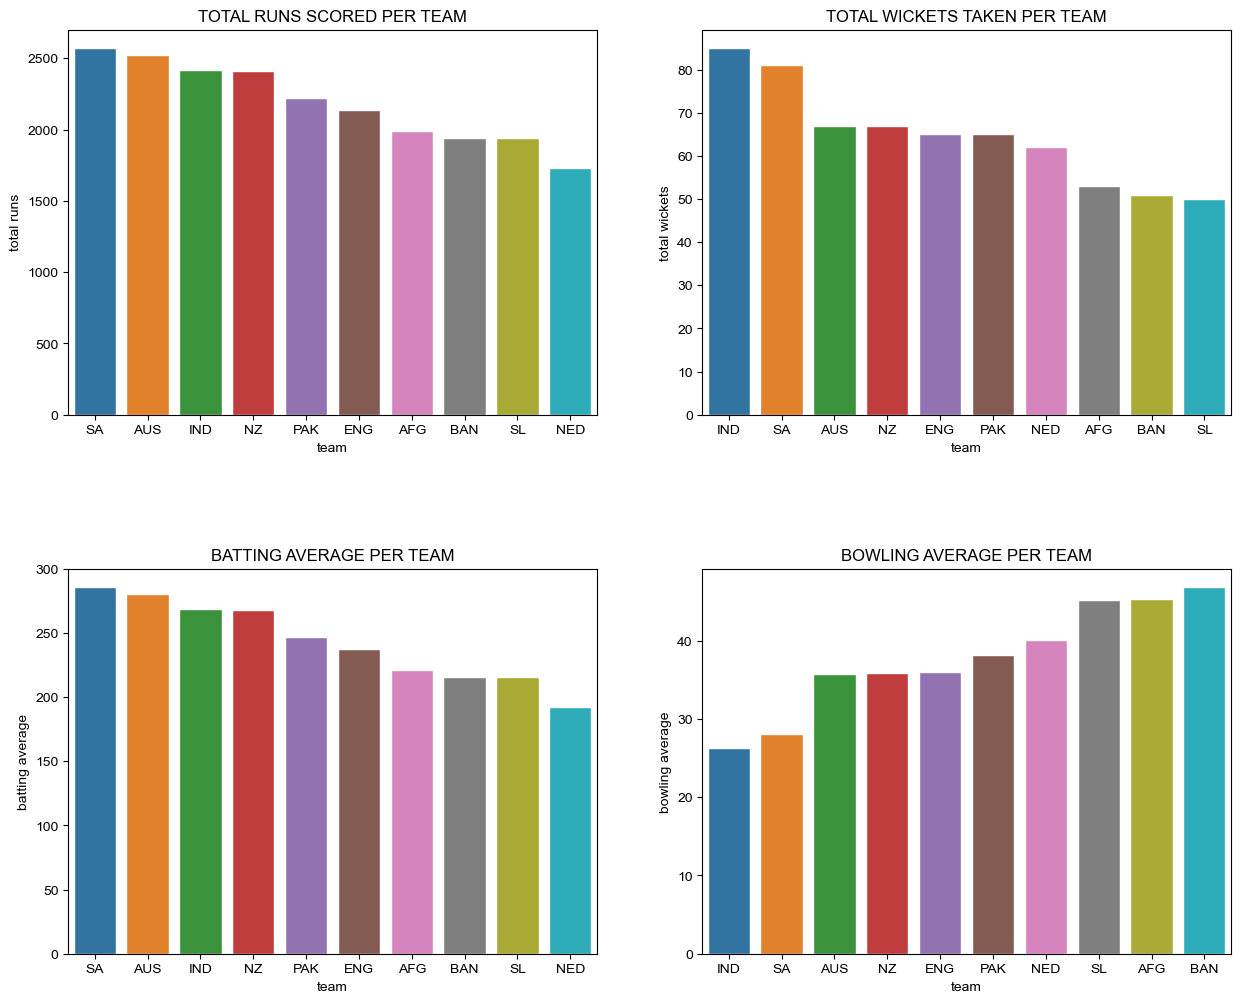

In [8]:
fig,((ax0, ax1), (ax2, ax3))= plt.subplots(nrows=2,ncols=2,figsize=(15,12))
plt.subplots_adjust(hspace=.4)
sns.set_style('darkgrid')
sns.set_style('ticks')
sns.set_context('notebook')

# first plot 
sorted_data = performance_metrics.sort_values('total runs',ascending=False)
sns.barplot(x=sorted_data.index,y=sorted_data['total runs'],ax=ax0)
ax0.set(title='TOTAL RUNS SCORED PER TEAM')

# second plot 
sorted_data = performance_metrics.sort_values('total wickets',ascending=False)
sns.barplot(x=sorted_data.index,y=sorted_data['total wickets'],ax=ax1)
ax1.set(title='TOTAL WICKETS TAKEN PER TEAM')

# third plot
sorted_data = performance_metrics.sort_values('batting average',ascending=False)
sns.barplot(x=sorted_data.index,y=sorted_data['batting average'],ax=ax2)
ax2.set(title='BATTING AVERAGE PER TEAM')

# fourth plot
sorted_data = performance_metrics.sort_values('bowling average',ascending=True)
sns.barplot(x=sorted_data.index,y=sorted_data['bowling average'],ax=ax3)
ax3.set(title='BOWLING AVERAGE PER TEAM')
plt.show()

In [9]:
# leading run score
lead_run = data[data['bat_or_bowl'] == 'bat'].groupby('player')['runs'].sum().sort_values(ascending=False)
# leading wicket taker
lead_wick = round(data[data['bat_or_bowl'] == 'bowl'].groupby('player')['wkts'].sum(),1).sort_values(ascending=False)
# average run score 
avg_score = round((data[data['bat_or_bowl'] == 'bat'].groupby('player')['runs'].sum() / 9),1).sort_values(ascending=False)
# average wicket taker 
avg_wick = round((data[data['bat_or_bowl'] == 'bowl'].groupby('player')['wkts'].sum() / 9),1).sort_values(ascending=False)
# average strike rate
avg_strike_rate = round(data[data['bat_or_bowl'] == 'bat'].groupby('player')['sr'].mean(),1).sort_values(ascending=False)
# avg_economy
avg_econ = round(data[data['bat_or_bowl'] == 'bowl'].groupby('player')['econ'].mean(),1).sort_values(ascending=False)

In [10]:
player_performance = pd.DataFrame({'lead scorer' : lead_run,
                                   'lead wick taker' : lead_wick,
                                   'average run' : avg_score,
                                   'average wicket' : avg_wick,
                                   'strike rate' : avg_strike_rate,
                                   'economy' : avg_econ})

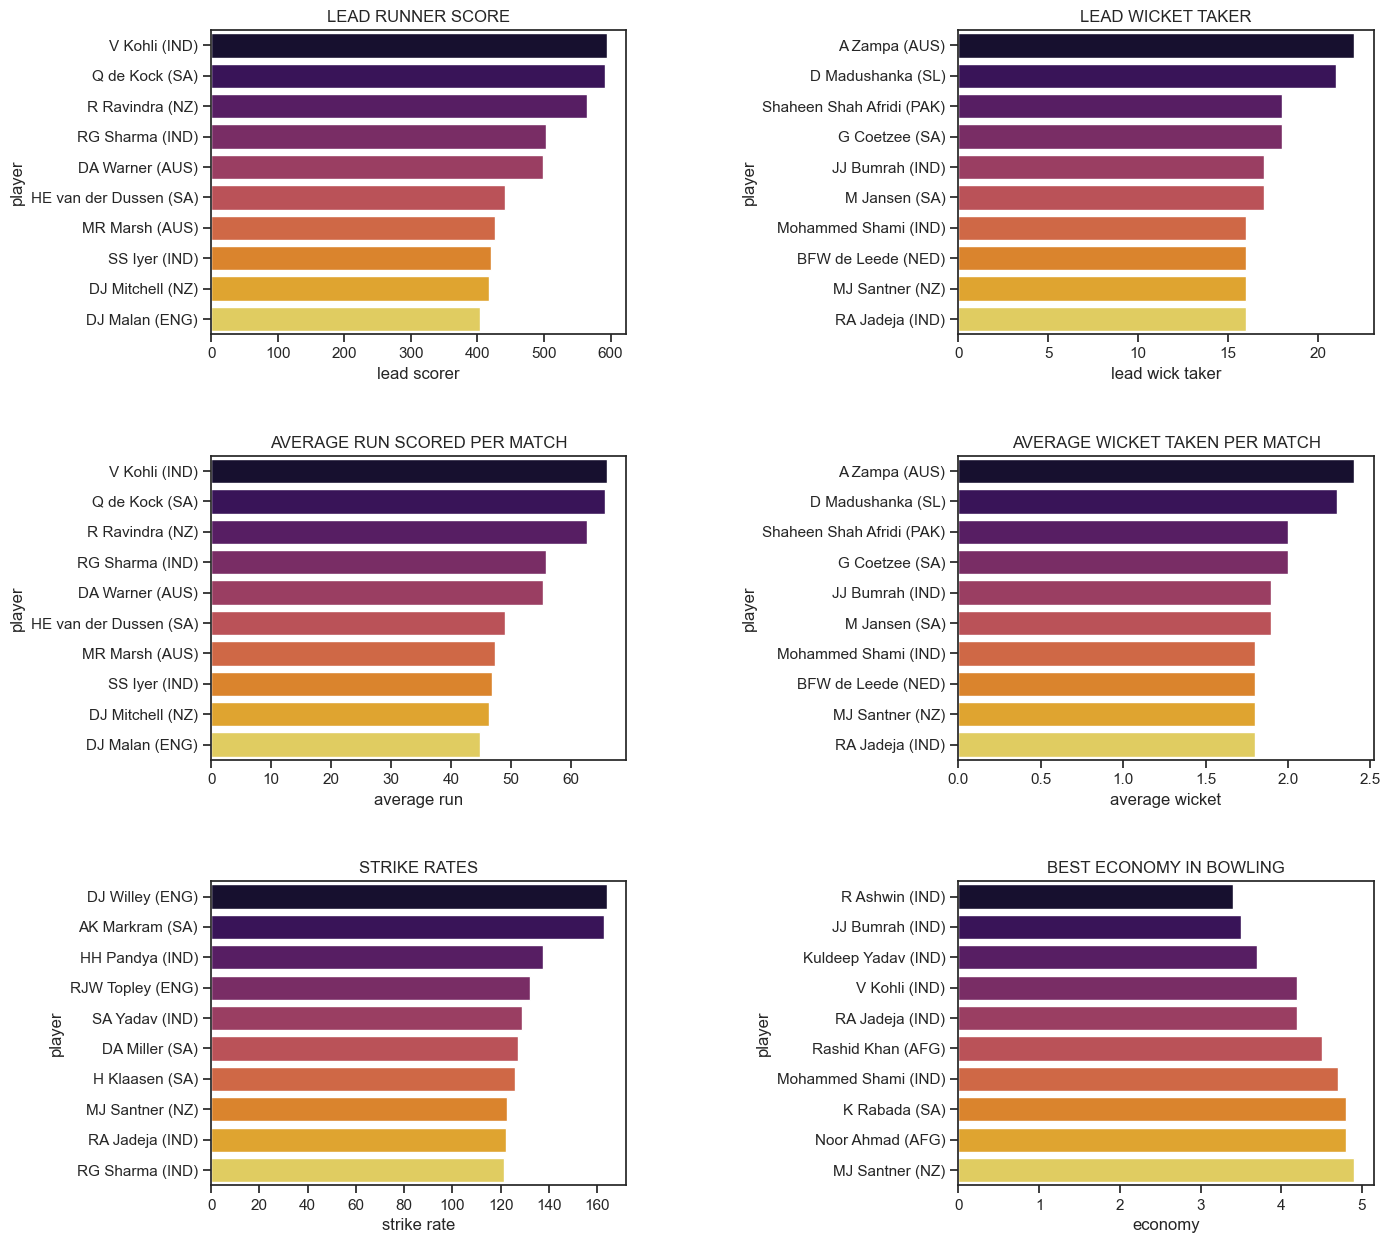

In [11]:
# plotting
fig,((ax0,ax1),(ax2,ax3),(ax4,ax5)) = plt.subplots(nrows=3,ncols=2,figsize=(15,15))
plt.subplots_adjust(hspace=0.4, wspace=.8)
sns.set_style('whitegrid')
sns.set_style('ticks')
sns.set_context('notebook')
# lead_scorer 
sorted_data = player_performance.sort_values('lead scorer',ascending=False).head(10)
sns.barplot(x=sorted_data['lead scorer'],y=sorted_data.index,ax=ax0,palette='inferno')
ax0.set(title='LEAD RUNNER SCORE')

# lead wicket taker
sorted_data = player_performance.sort_values('lead wick taker',ascending=False).head(10)
sns.barplot(x=sorted_data['lead wick taker'],y=sorted_data.index,ax=ax1,palette='inferno')
ax1.set(title='LEAD WICKET TAKER')

# average run scorer per match
sorted_data = player_performance.sort_values('average run',ascending=False).head(10)
sns.barplot(x=sorted_data['average run'],y=sorted_data.index,ax=ax2,palette='inferno')
ax2.set(title='AVERAGE RUN SCORED PER MATCH')

# average wicket taker per match
sorted_data = player_performance.sort_values('average wicket',ascending=False).head(10)
sns.barplot(x=sorted_data['average wicket'],y=sorted_data.index,ax=ax3,palette='inferno')
ax3.set(title='AVERAGE WICKET TAKEN PER MATCH')

# average strike rate
sorted_data = player_performance.sort_values('strike rate',ascending=False).head(10)
sns.barplot(x=sorted_data['strike rate'],y=sorted_data.index,ax=ax4,palette='inferno')
ax4.set(title='STRIKE RATES')

# economy
sorted_data = player_performance.sort_values('economy',ascending=True).head(10)
sns.barplot(x=sorted_data['economy'],y=sorted_data.index,ax=ax5,palette='inferno')
ax5.set(title='BEST ECONOMY IN BOWLING')

plt.show()

In [12]:
# opposition analysis
team_opposition = data.groupby(['team','opposition','player','bat_or_bowl','ground'])[['start_date','bb_bf', 'runs', 'wkts']].first().reset_index()

In [13]:
run_scored = team_opposition[team_opposition['bat_or_bowl'] == 'bat'].groupby(['team','opposition'])[['runs']].sum().reset_index()
wicket_taken = team_opposition[team_opposition['bat_or_bowl'] == 'bowl'].groupby(['team','opposition'])[['wkts']].sum().reset_index()

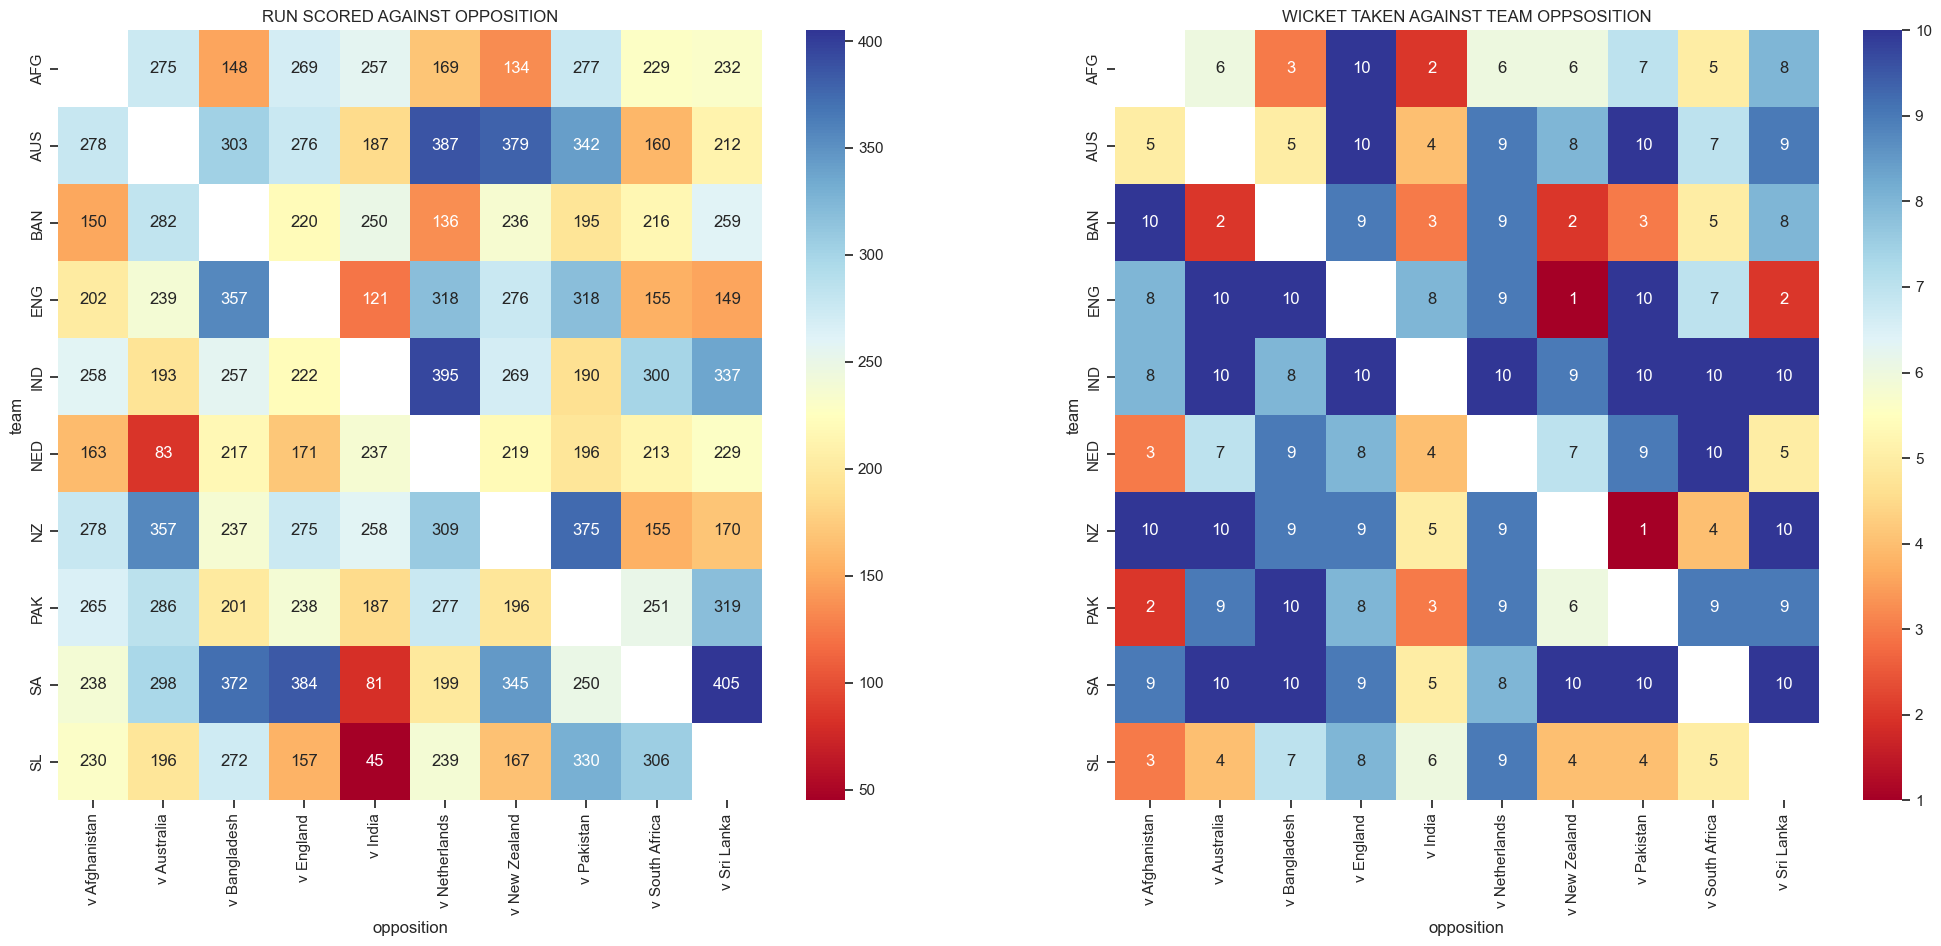

In [14]:
# heat_map_plotting
pivot_run_scored = run_scored.pivot(index='team',columns='opposition',values='runs')
pivot_wicket_taken = wicket_taken.pivot(index='team',columns='opposition',values='wkts')

fig,(ax0,ax1) = plt.subplots(nrows=1,ncols=2,figsize=(25,10))
plt.subplots_adjust()
sns.set_context('notebook')

sns.heatmap(pivot_run_scored,annot=True,fmt='g',cmap='RdYlBu',ax=ax0)
ax0.set(title='RUN SCORED AGAINST OPPOSITION')

sns.heatmap(pivot_wicket_taken,annot=True,cmap='RdYlBu',fmt='g',ax=ax1)
ax1.set(title='WICKET TAKEN AGAINST TEAM OPPSOSITION')

plt.show()

In [15]:
# ground_analysis
run_on_ground = team_opposition[team_opposition['bat_or_bowl'] == 'bat'].groupby(['team','ground','start_date'])['runs'].sum().reset_index()
wicket_on_ground = team_opposition[team_opposition['bat_or_bowl'] == 'bowl'].groupby(['team','ground','start_date'])['wkts'].sum().reset_index()

In [16]:
run_on_ground = run_on_ground.groupby(['team','ground'])[['runs']].mean().reset_index()
run_on_ground['runs'] = round(run_on_ground['runs'],0)
wicket_on_ground = wicket_on_ground.groupby(['team','ground'])[['wkts']].mean().reset_index()
wicket_on_ground['wkts'] = round(wicket_on_ground['wkts'],1)

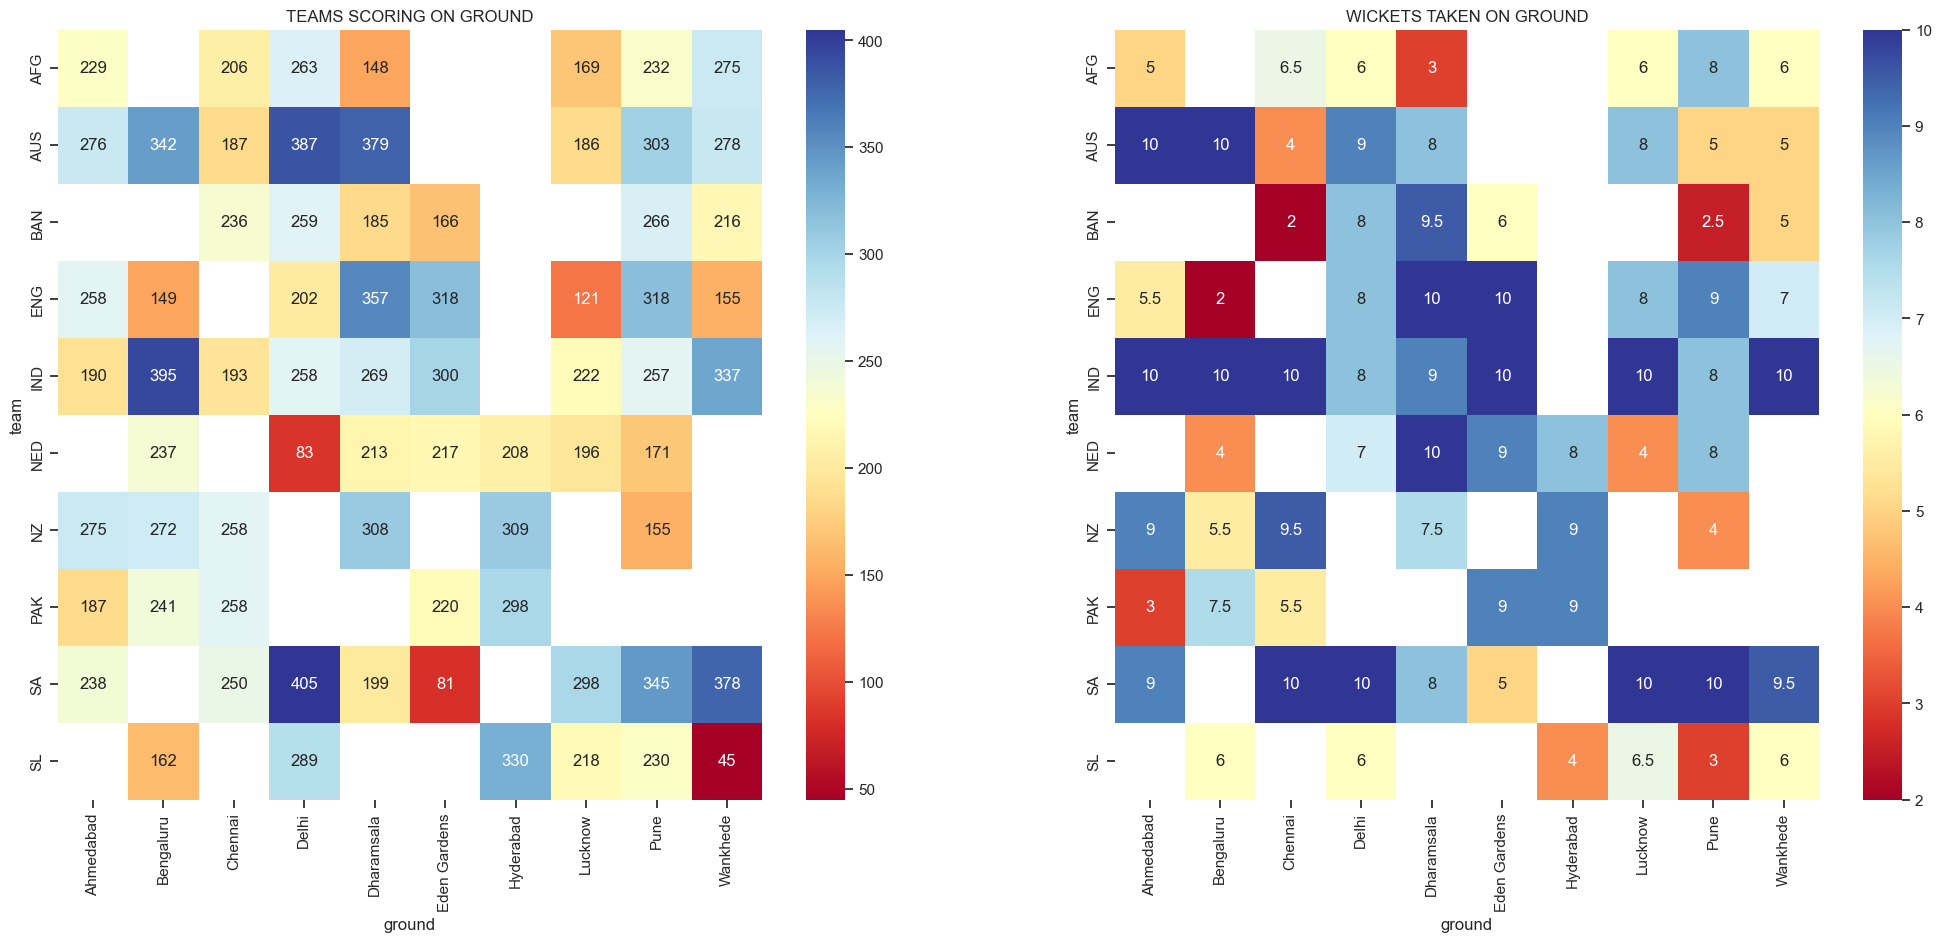

In [25]:
# heat map plotting
pivot_run_on_ground = run_on_ground.pivot(index='team',columns='ground',values='runs')
pivot_wicket_on_ground = wicket_on_ground.pivot(index='team',columns='ground',values='wkts')

fig,(ax0,ax1) = plt.subplots(nrows=1,ncols=2,figsize=(25,10))
sns.set_context('notebook')

sns.heatmap(pivot_run_on_ground,annot=True,fmt='g',cmap='RdYlBu',ax=ax0)
ax0.set(title='TEAMS SCORING ON GROUND')

sns.heatmap(pivot_wicket_on_ground,annot=True,fmt='g',cmap='RdYlBu',ax=ax1)
ax1.set(title='WICKETS TAKEN ON GROUND')

plt.show()

In [18]:
# ground analysis avg runs and wicket 
# total run per ground
run_per_ground = data[data['bat_or_bowl'] == 'bat'].groupby('ground')['runs'].sum()  

# per ground count
count_per_ground = data.groupby(['team','opposition','ground']).first()
count_per_ground.reset_index(inplace=True)
count = count_per_ground['ground'].value_counts()

avg_run_ground = pd.concat([run_per_ground,count],axis=1)

avg_run_ground['avg_run'] = (avg_run_ground['runs'] / avg_run_ground['ground'])
avg_run_ground.reset_index(inplace=True)
avg_run_ground.rename(columns={'ground':'count','index':'ground'},inplace=True)

# total wicket per ground
wicket_per_ground = data[data['bat_or_bowl'] == 'bowl'].groupby('ground')['wkts'].sum()

avg_wick_ground = pd.concat([wicket_per_ground,count],axis=1)

avg_wick_ground['avg_wick'] = avg_wick_ground['wkts'] / avg_wick_ground['ground']
avg_wick_ground.reset_index(inplace=True)
avg_wick_ground.rename(columns={'ground':'count','index':'ground'},inplace=True)

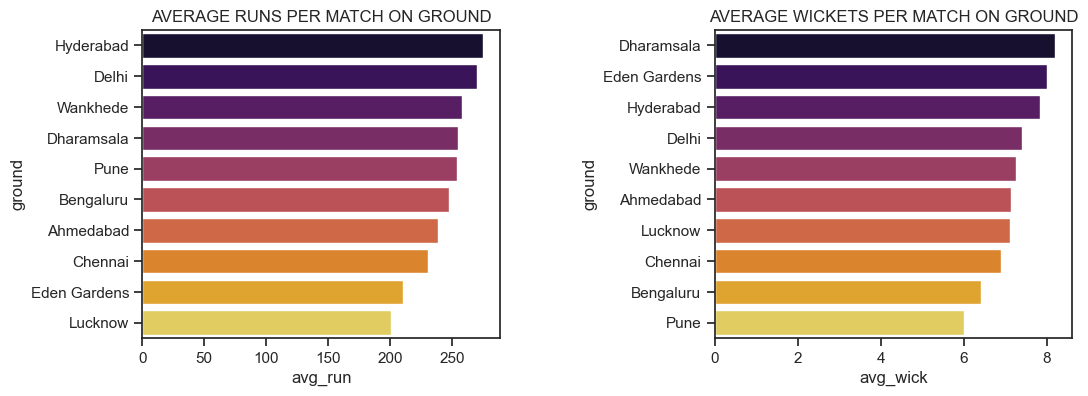

In [19]:
# plotting
fig,(ax0,ax1) = plt.subplots(nrows=1,ncols=2,figsize=(12,4))
sns.set_style('darkgrid')
sns.set_context('notebook')
sns.set_style('ticks')
plt.subplots_adjust(wspace=0.6)

sorted_data = avg_run_ground.sort_values('avg_run',ascending=False)
sns.barplot(x=sorted_data['avg_run'],y=sorted_data['ground'],palette='inferno',ax=ax0)
ax0.set(title='AVERAGE RUNS PER MATCH ON GROUND')

sorted_data = avg_wick_ground.sort_values('avg_wick',ascending=False)
sns.barplot(x=sorted_data['avg_wick'],y=sorted_data['ground'],palette='inferno',ax=ax1)
ax1.set(title='AVERAGE WICKETS PER MATCH ON GROUND')

plt.show()

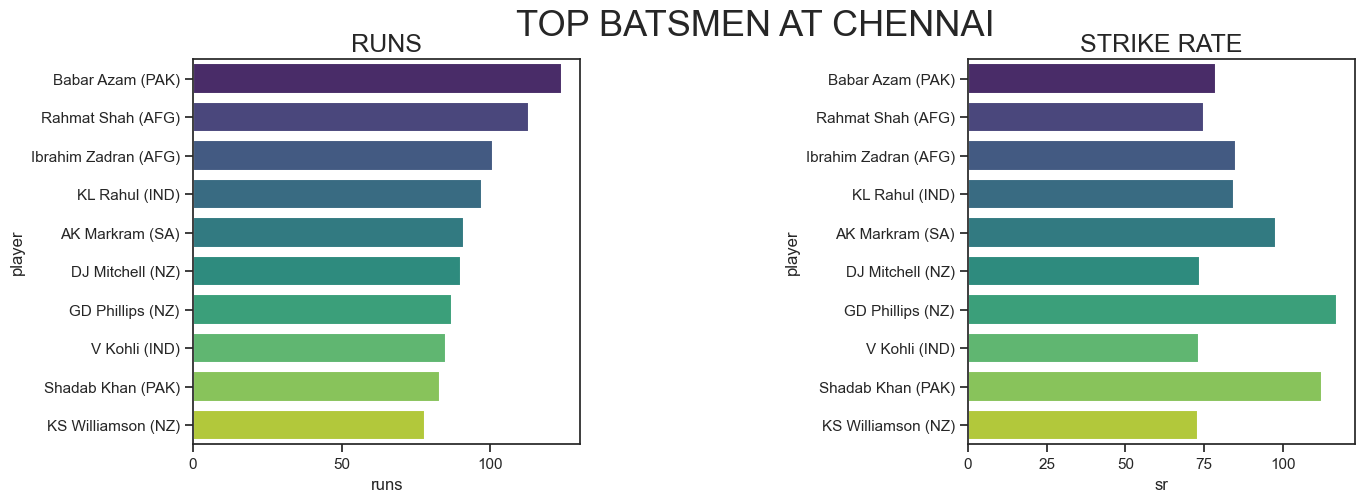

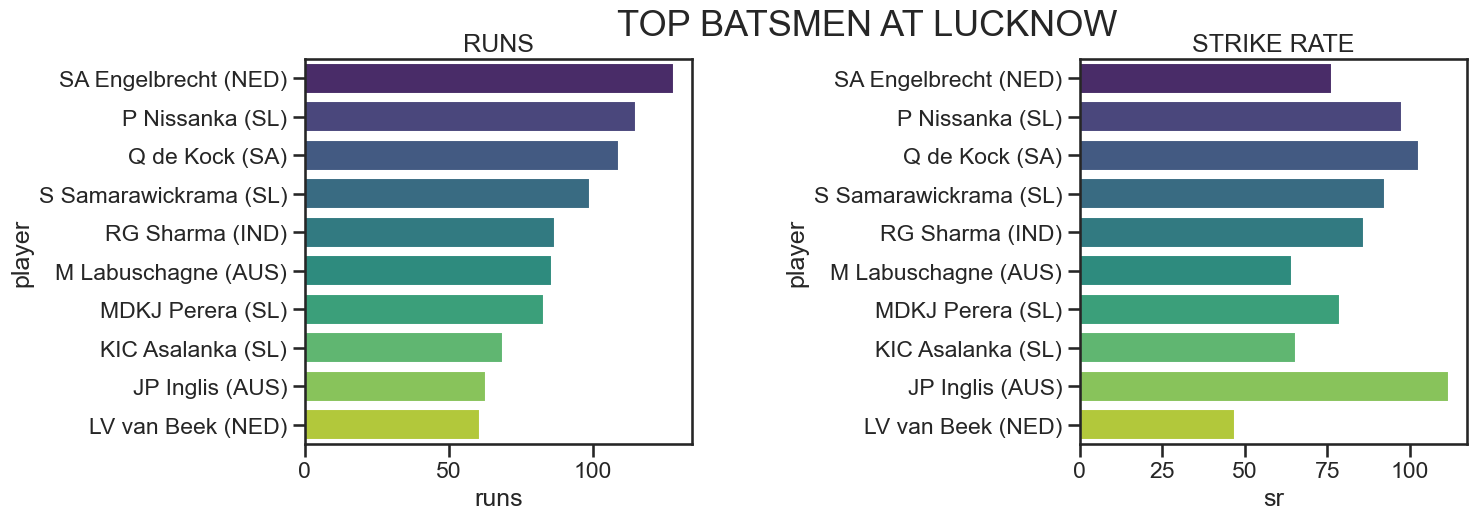

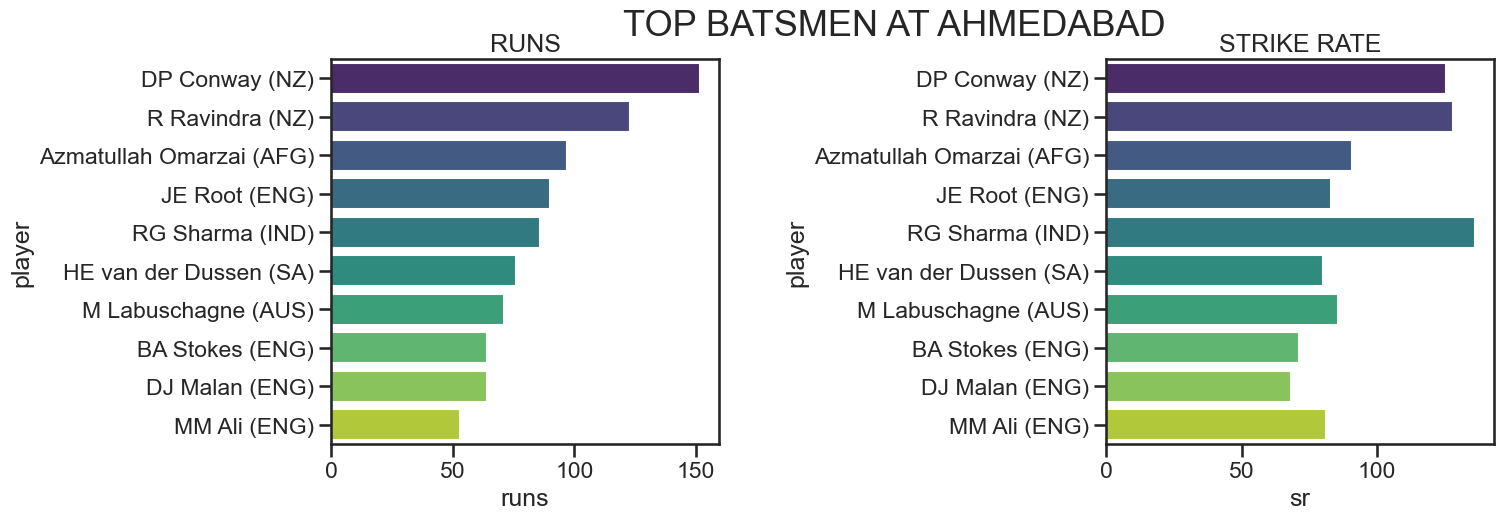

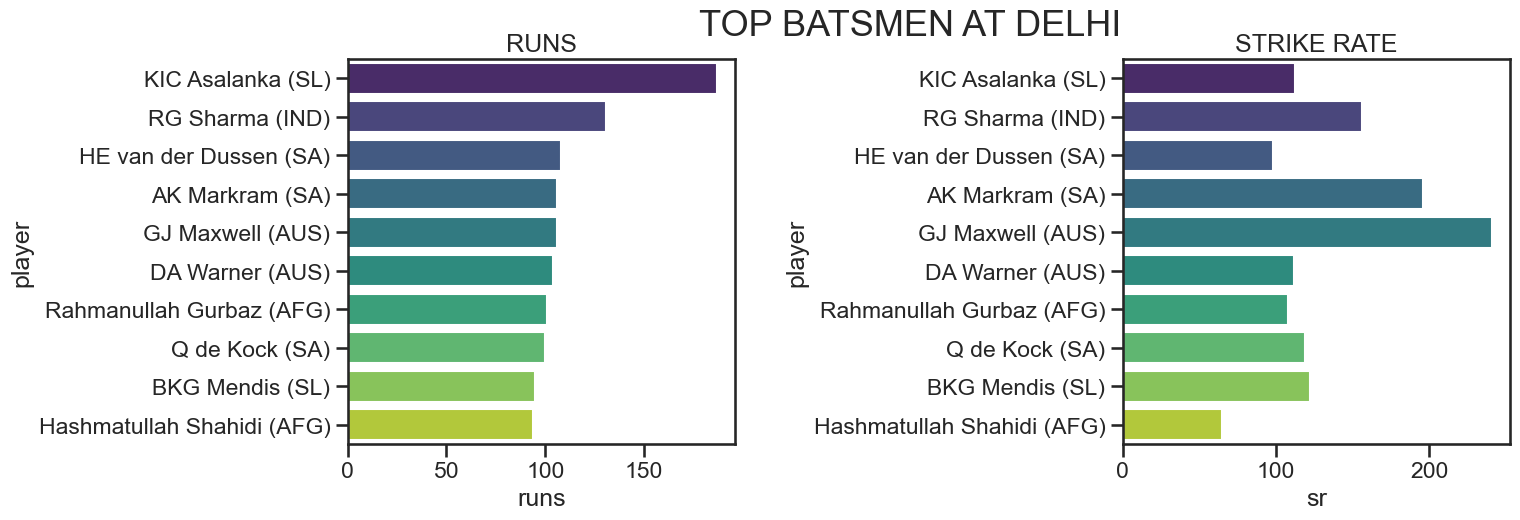

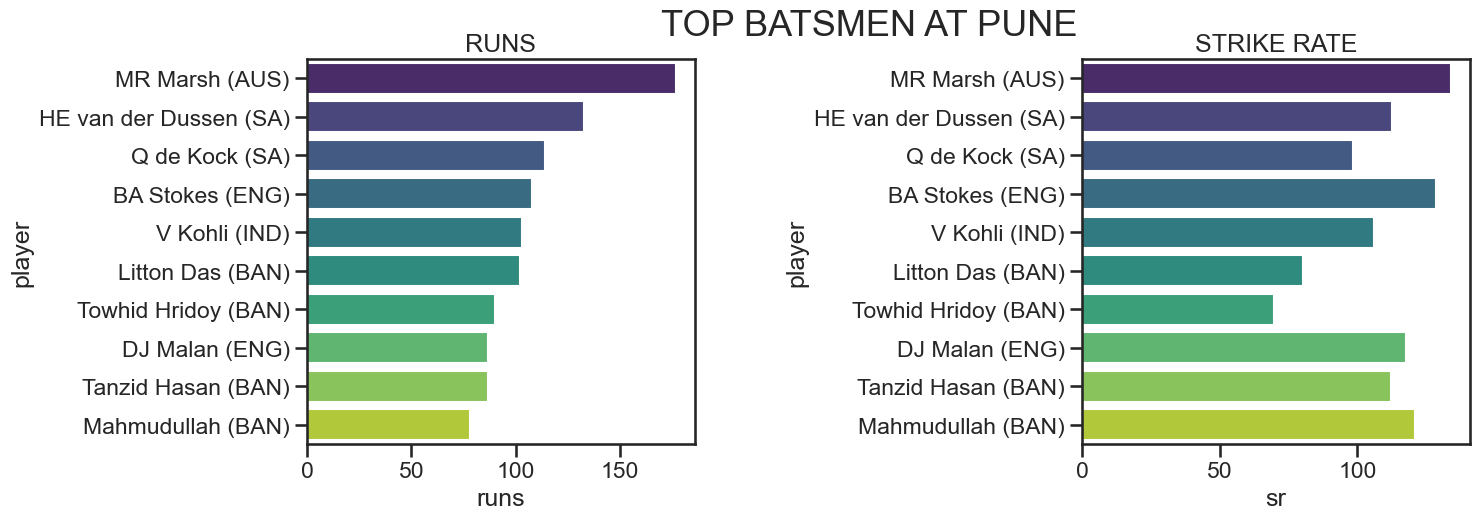

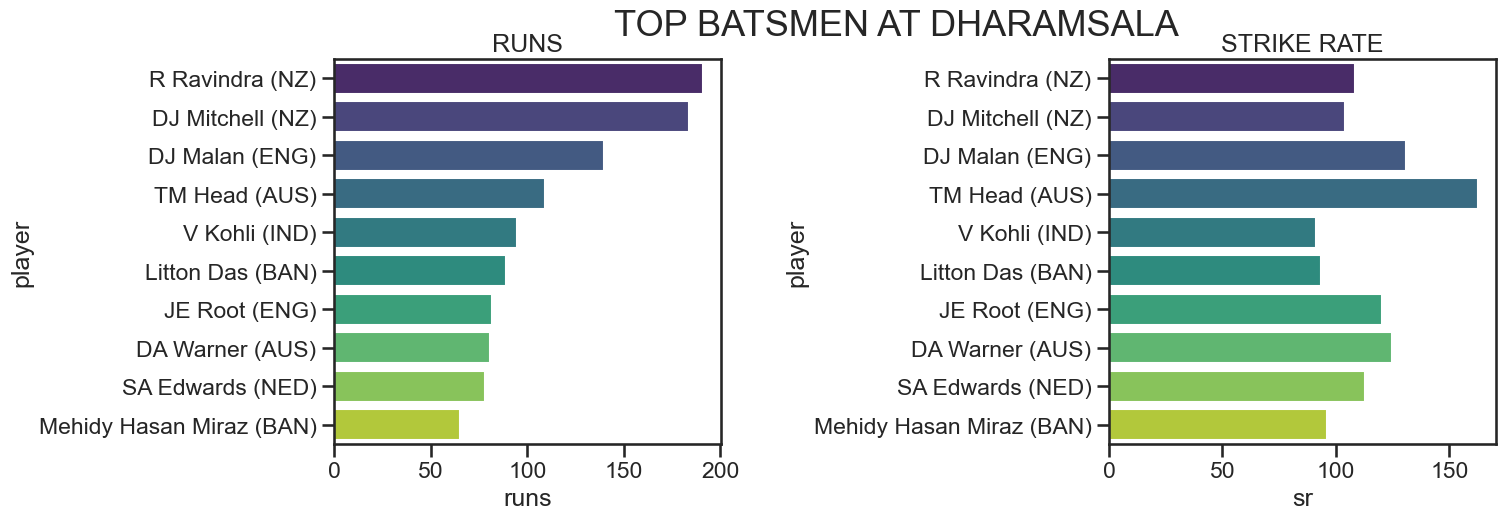

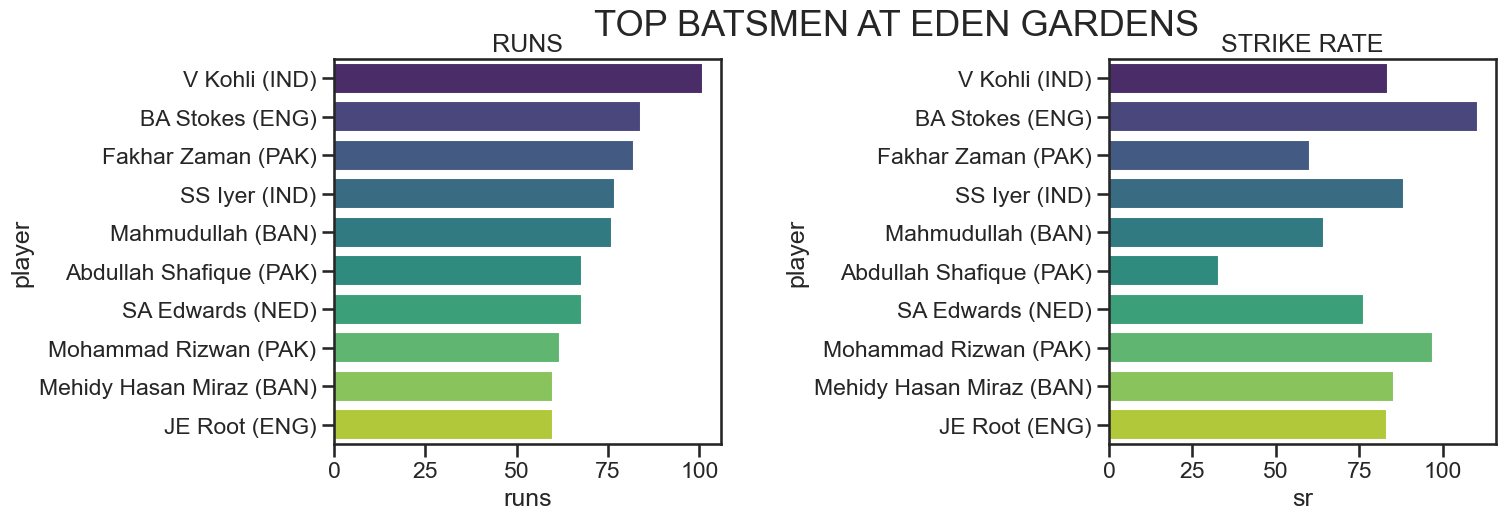

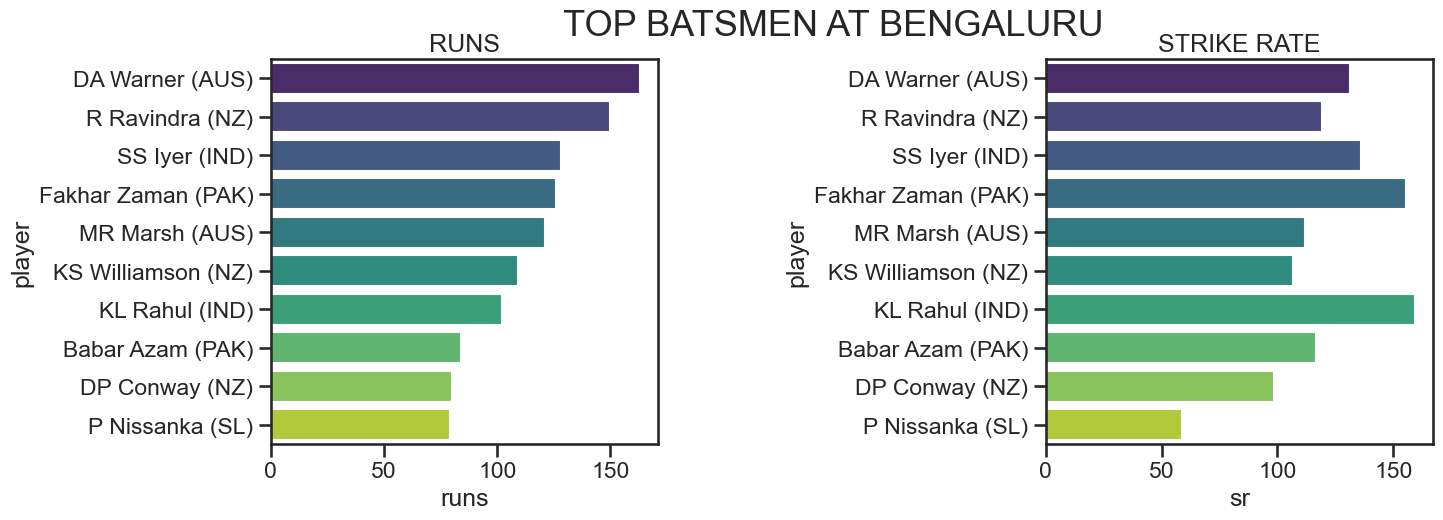

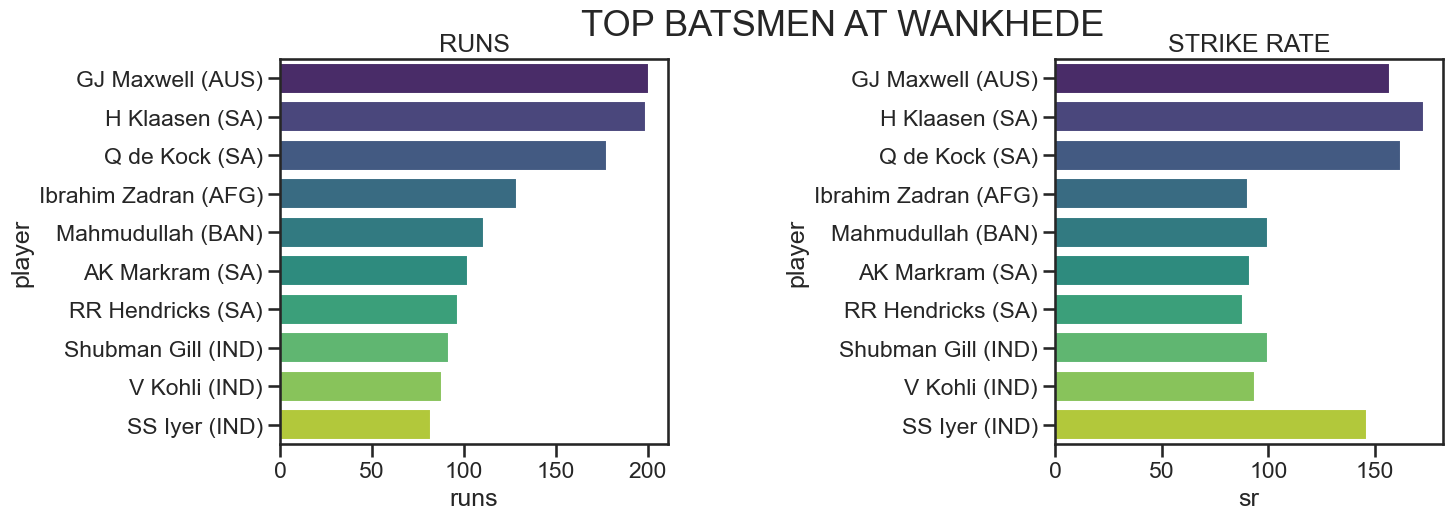

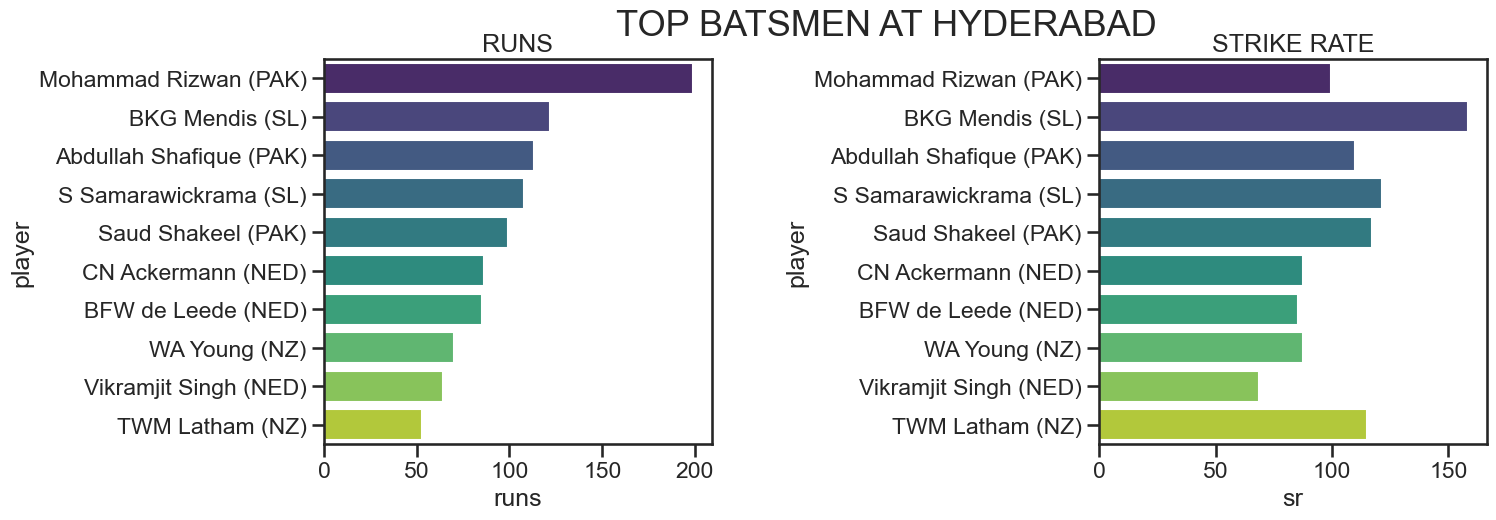

In [20]:
# player ground analysis
top_scorer = data[data['bat_or_bowl'] == 'bat'].groupby(['player',
                                                         'ground'])[['runs','sr']].agg({'runs':'sum',
                                                                                        'sr':'mean'}).sort_values('runs',ascending=False).reset_index()
names = data['ground'].unique()
names = list(names)
for ground_name in names:
    top_10_scorer = top_scorer[top_scorer['ground'] == ground_name][['player','runs','sr']].sort_values('runs',ascending=False).head(10)

    fig,(ax0,ax1) = plt.subplots(nrows=1,ncols=2,figsize=(15,5))
    sns.set_style('darkgrid')
    sns.set_style('ticks')
    sns.set_context('talk')
    plt.subplots_adjust(hspace = .4,wspace = 1)

    sns.barplot(x=top_10_scorer['runs'],y=top_10_scorer['player'],palette='viridis',ax=ax0)
    ax0.set(title = 'RUNS')

    sns.barplot(x=top_10_scorer['sr'],y=top_10_scorer['player'],palette='viridis',ax=ax1)
    ax1.set(title = 'STRIKE RATE')

    plt.suptitle(f'TOP BATSMEN AT {ground_name.upper()}', fontsize=26)
    plt.show()


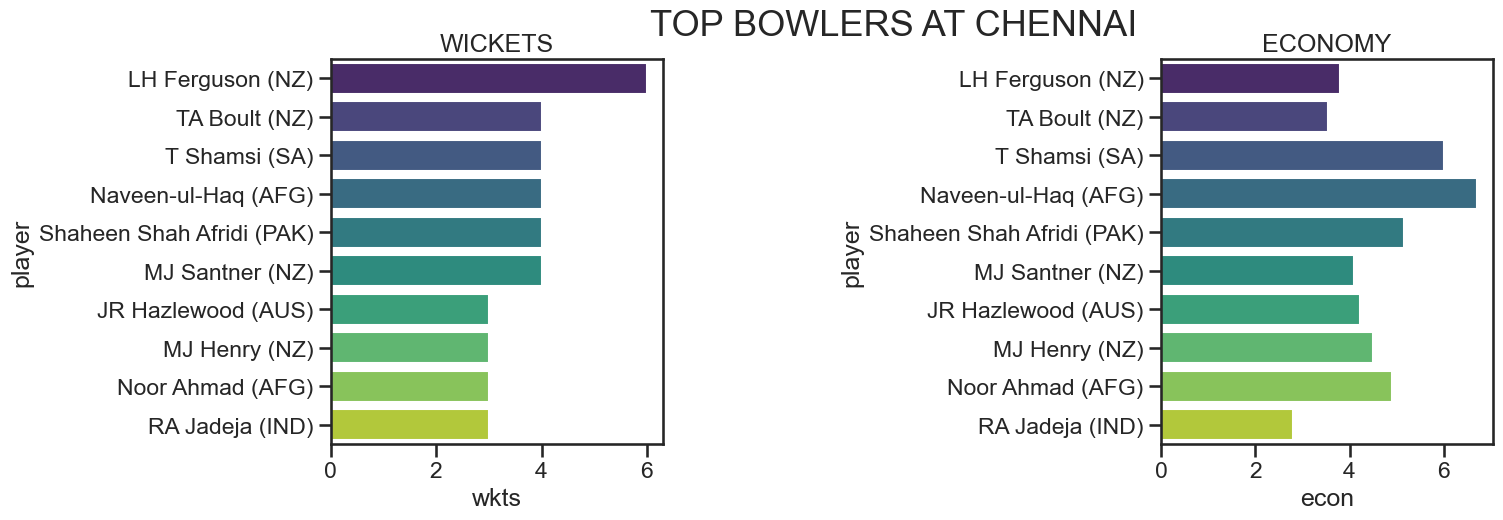

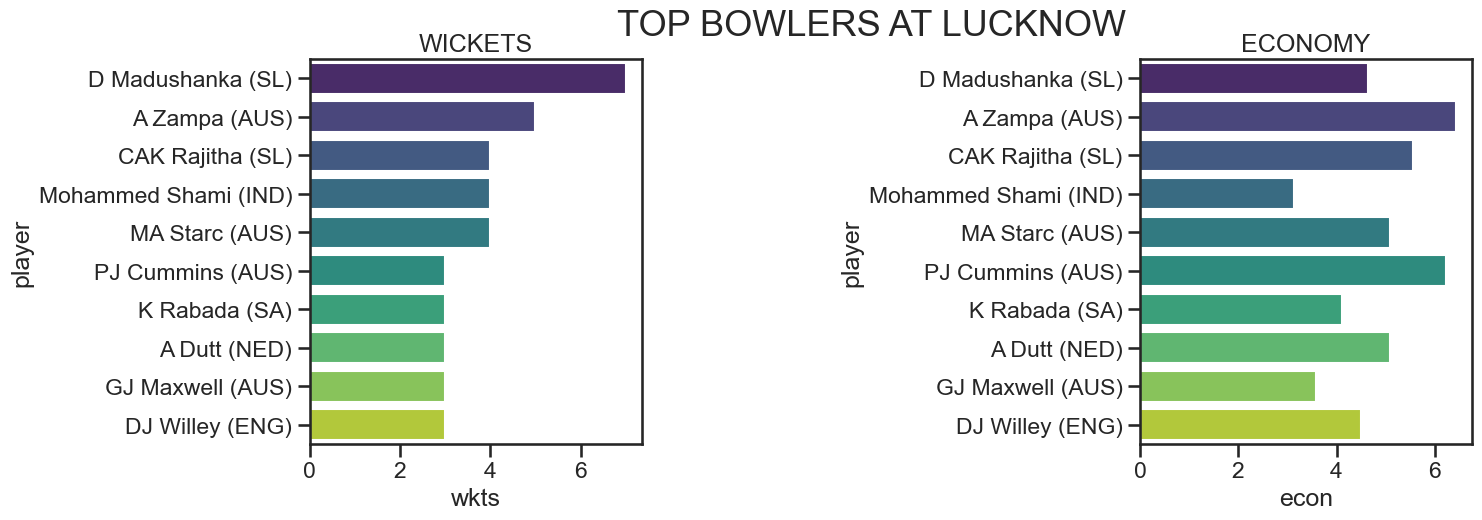

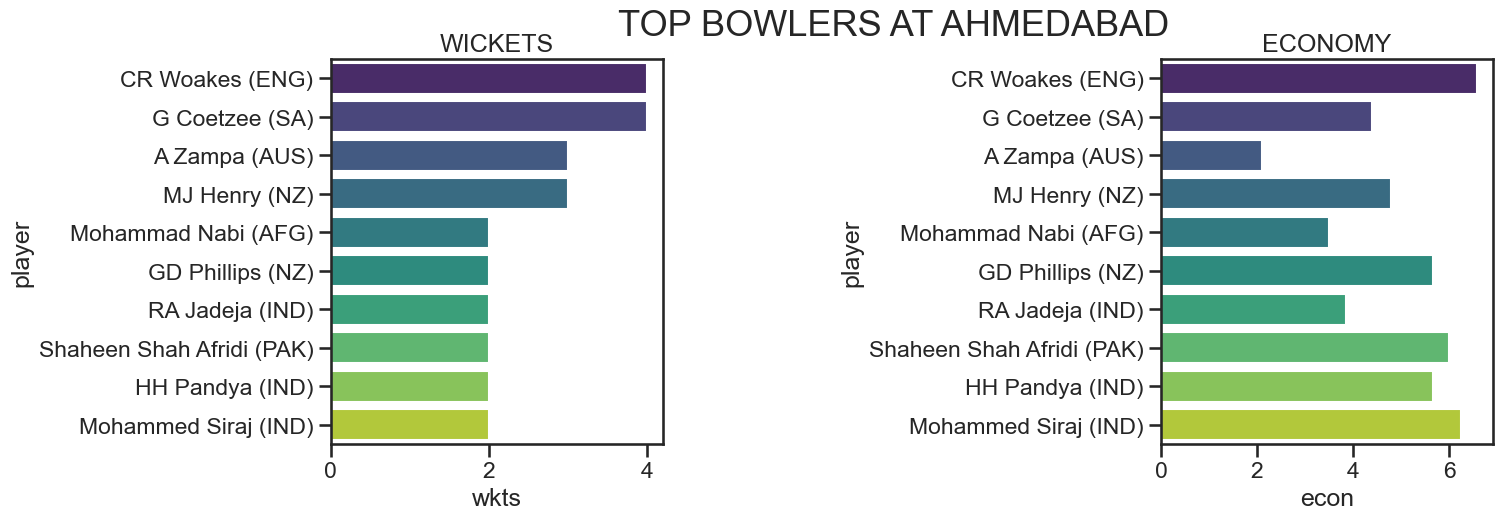

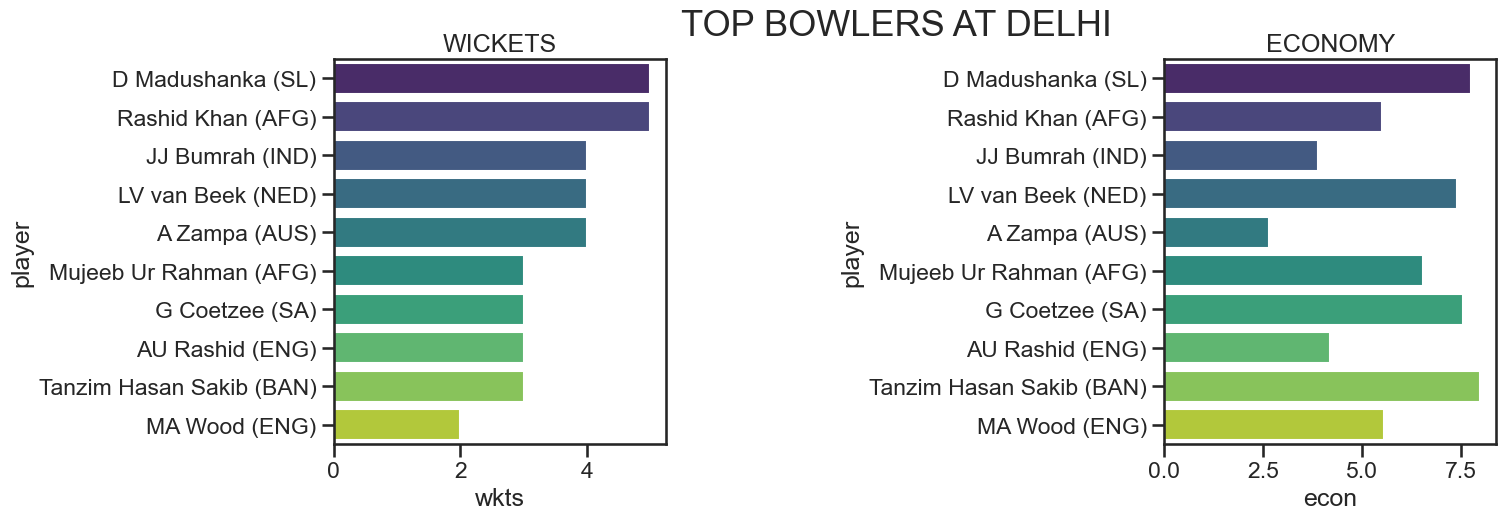

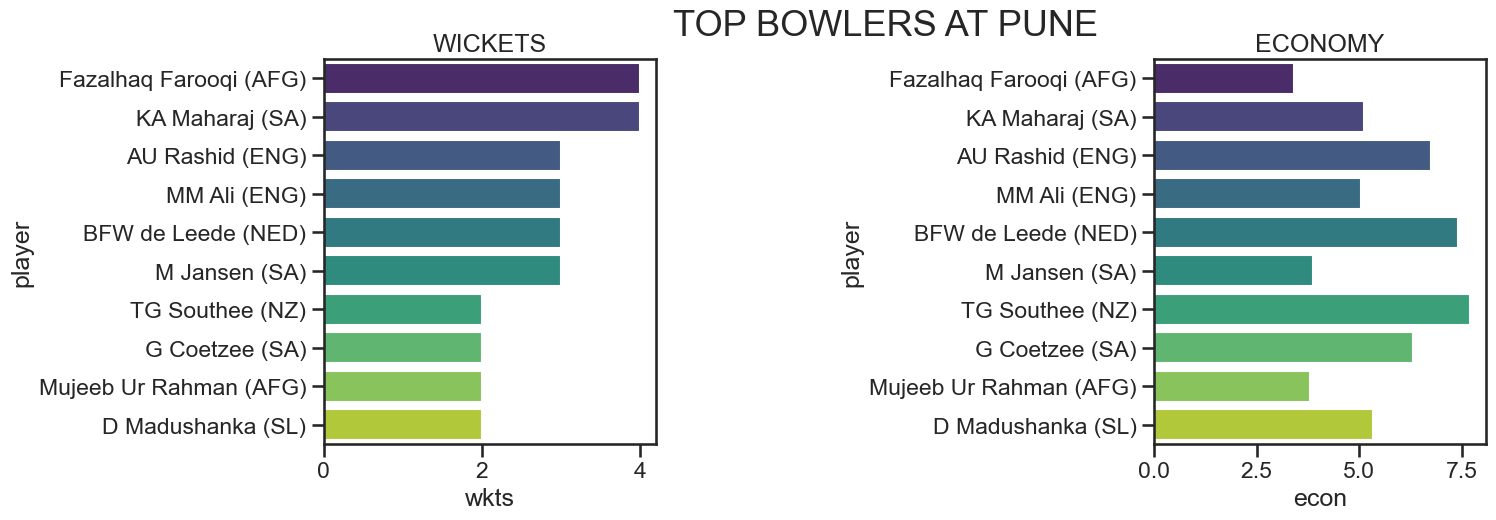

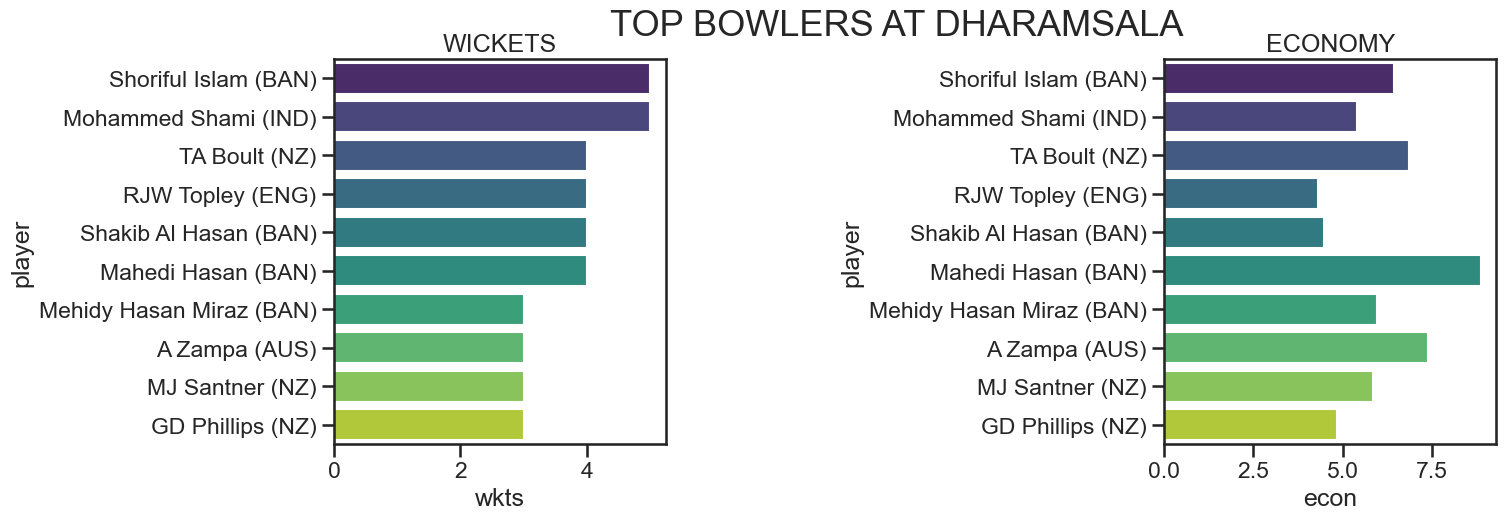

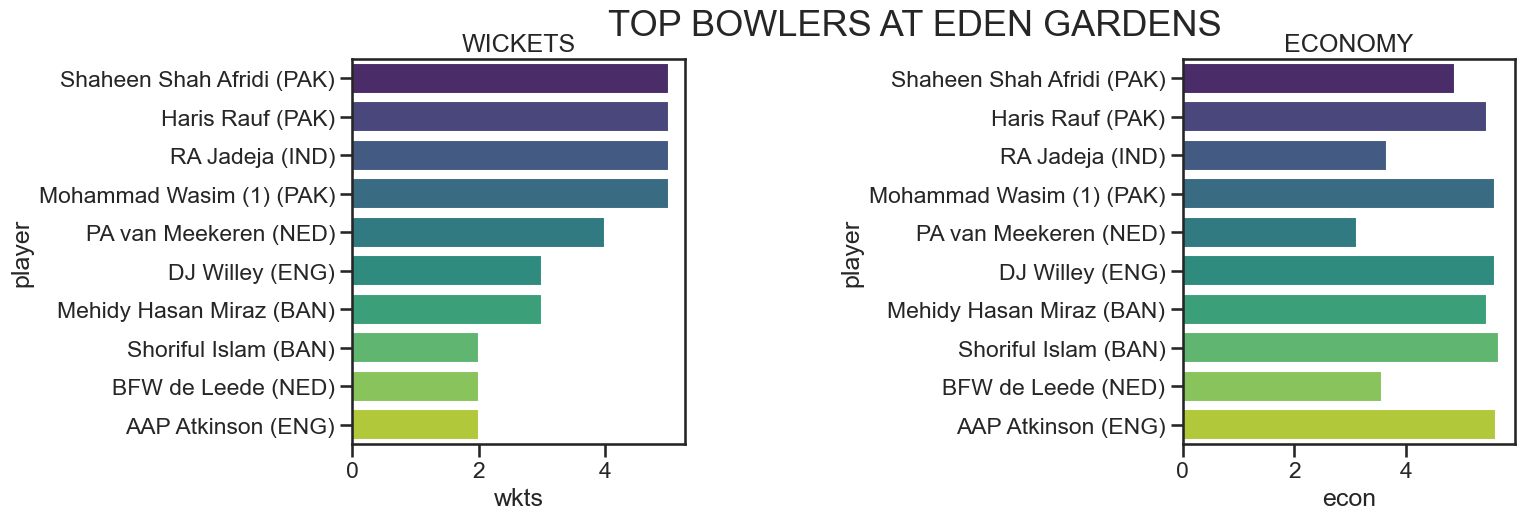

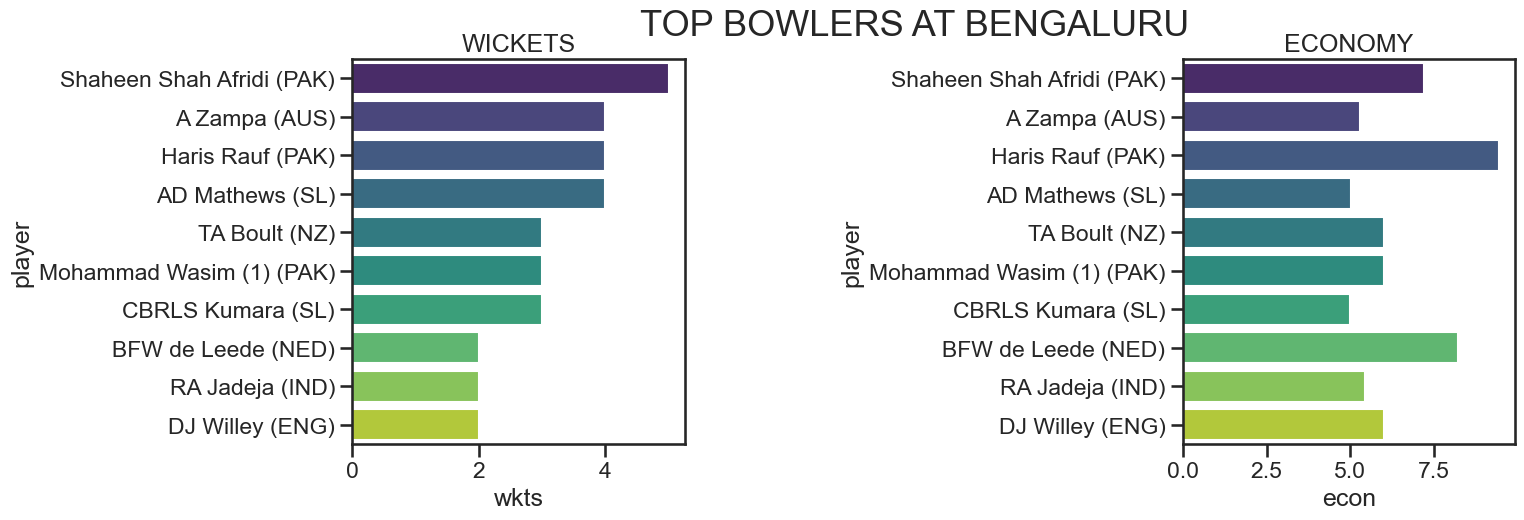

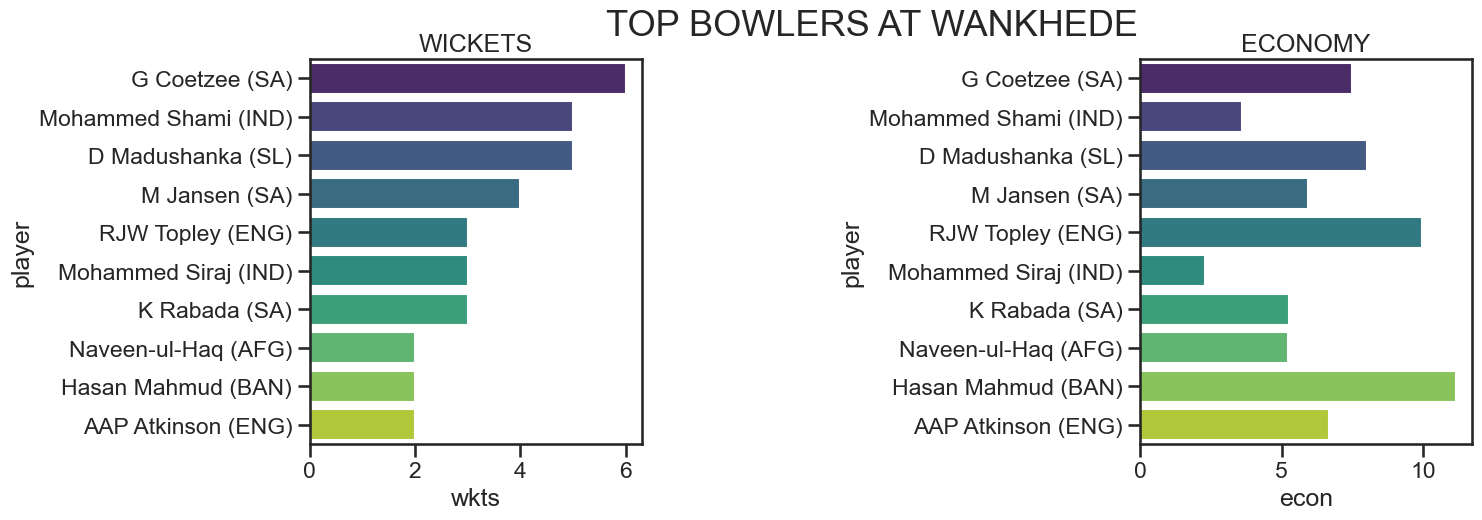

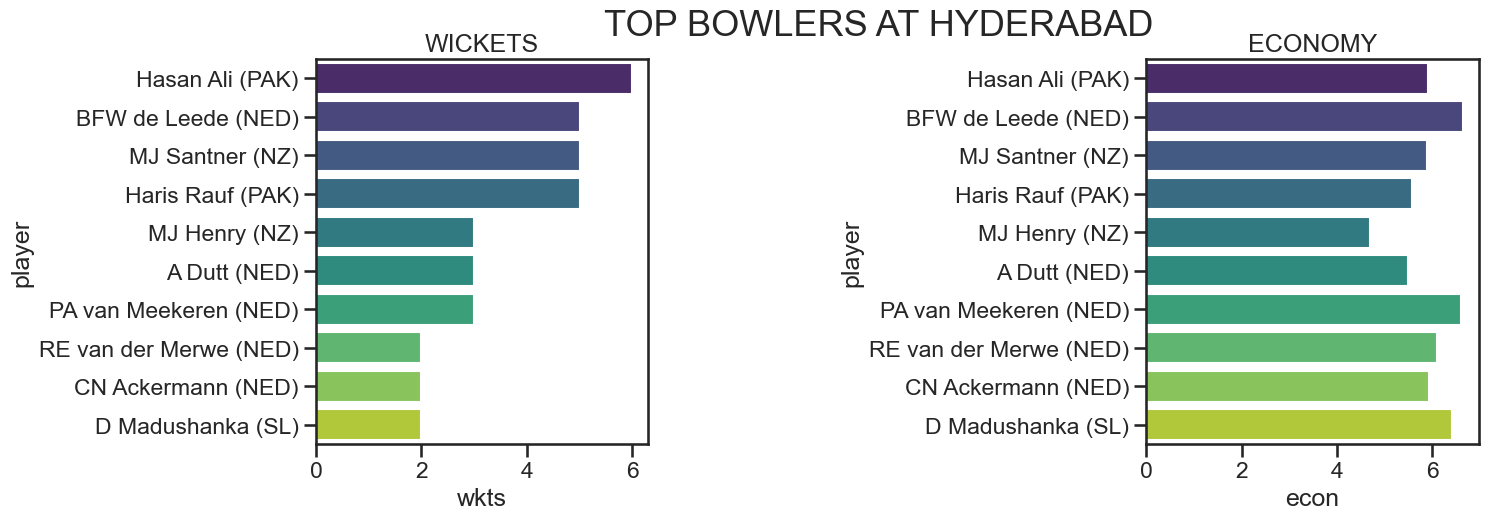

In [21]:
top_wicketer = data[data['bat_or_bowl'] == 'bowl'].groupby(['player',
                                                         'ground'])[['wkts','econ']].agg({'wkts':'sum',
                                                                                        'econ':'mean'}).sort_values('wkts',ascending=False).reset_index()
names = data['ground'].unique()
names = list(names)

for ground_name in names:
    top_10_wicketer = top_wicketer[top_wicketer['ground'] == ground_name][['player','wkts','econ']].sort_values('wkts',ascending=False).head(10)

    fig,(ax0,ax1) = plt.subplots(nrows=1,ncols=2,figsize=(15,5))
    sns.set_style('darkgrid')
    sns.set_style('ticks')
    sns.set_context('talk')
    plt.subplots_adjust(hspace = .4,wspace = 1.5)

    sns.barplot(x=top_10_wicketer['wkts'],y=top_10_wicketer['player'],palette='viridis',ax=ax0)
    ax0.set(title='WICKETS')

    sns.barplot(x=top_10_wicketer['econ'],y=top_10_wicketer['player'],palette='viridis',ax=ax1)
    ax1.set(title ='ECONOMY')

    plt.suptitle(f'TOP BOWLERS AT {ground_name.upper()}',fontsize=26)
    plt.show()

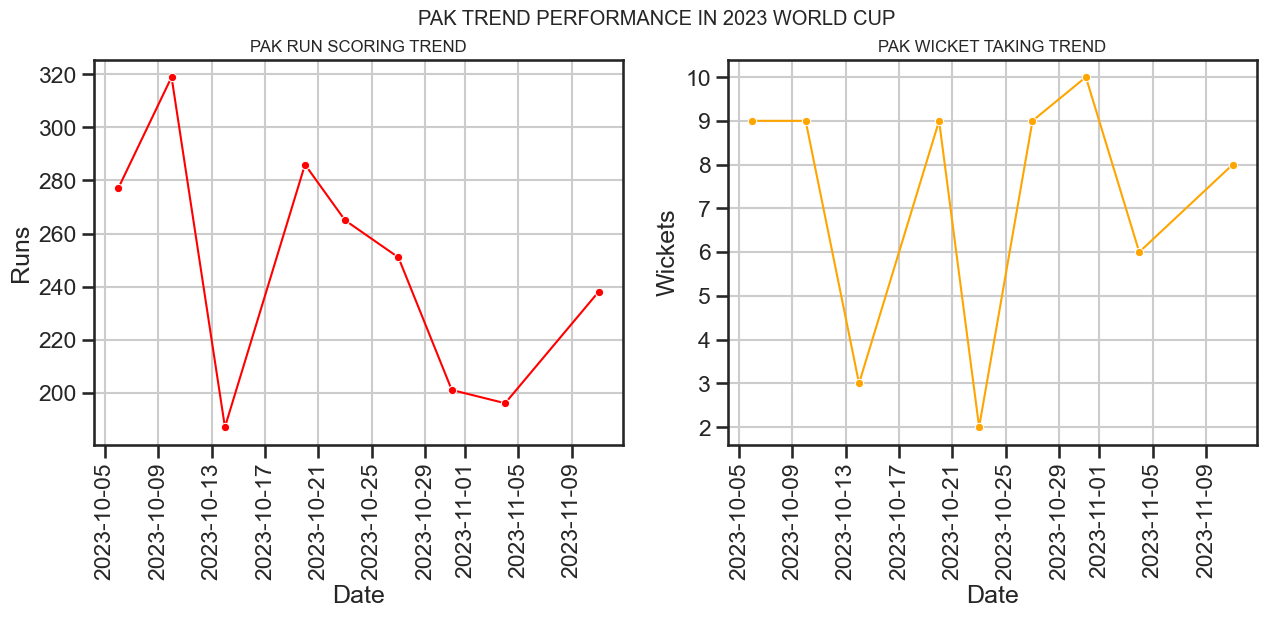

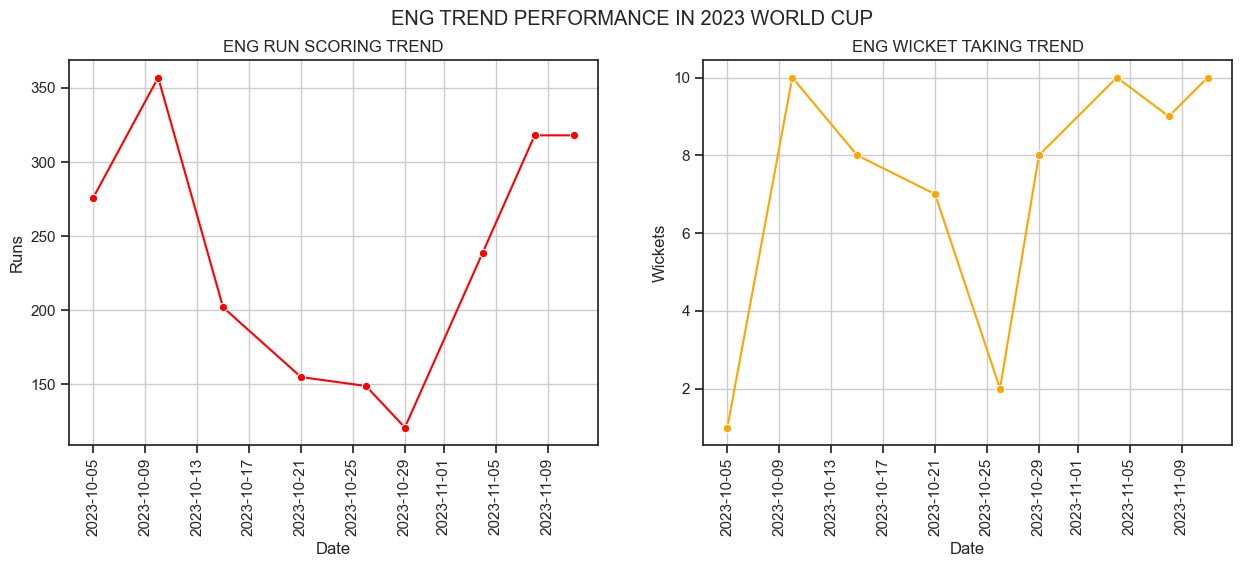

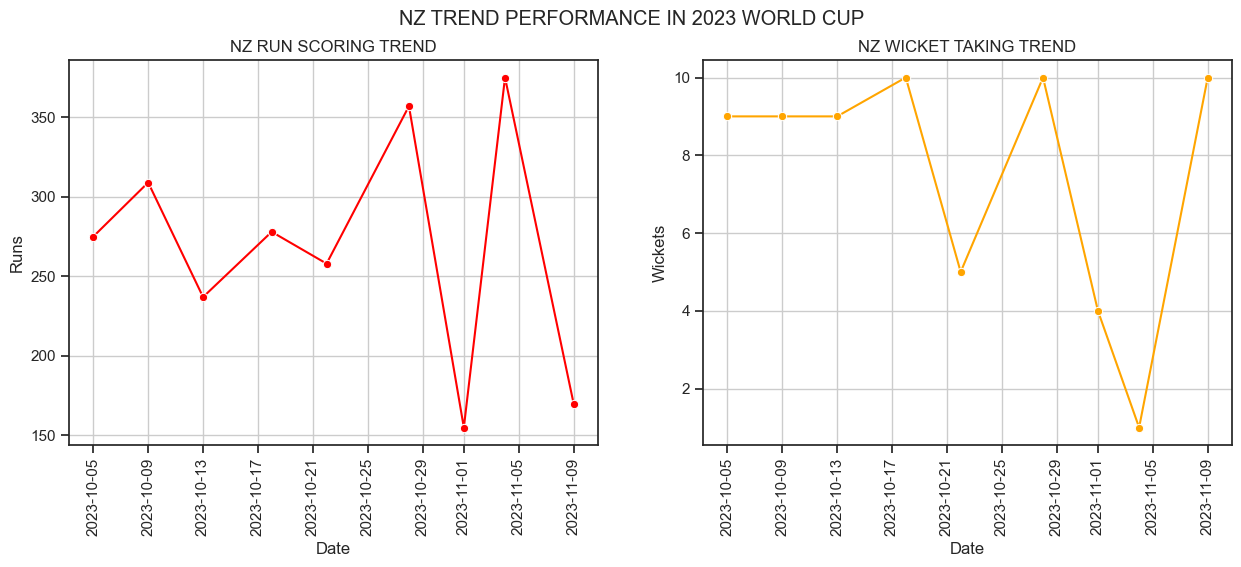

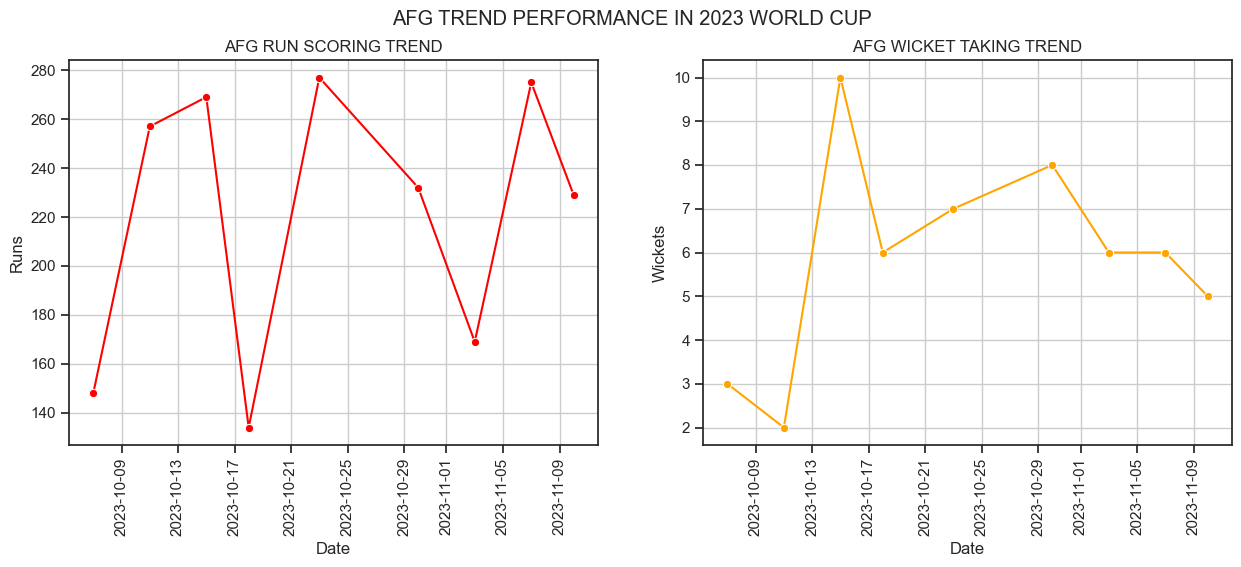

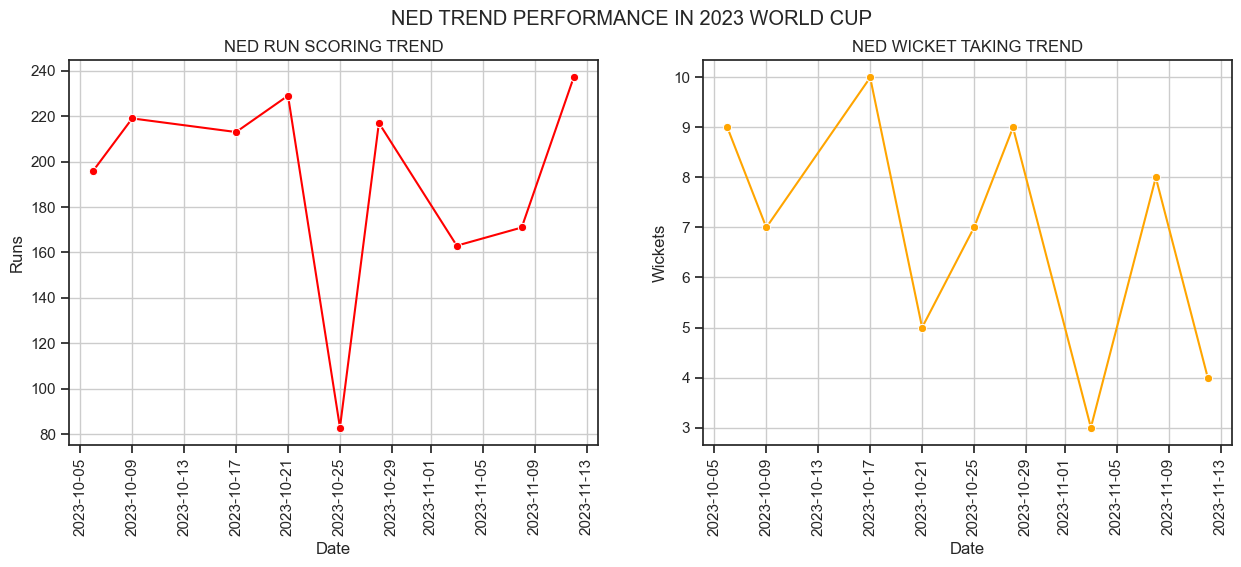

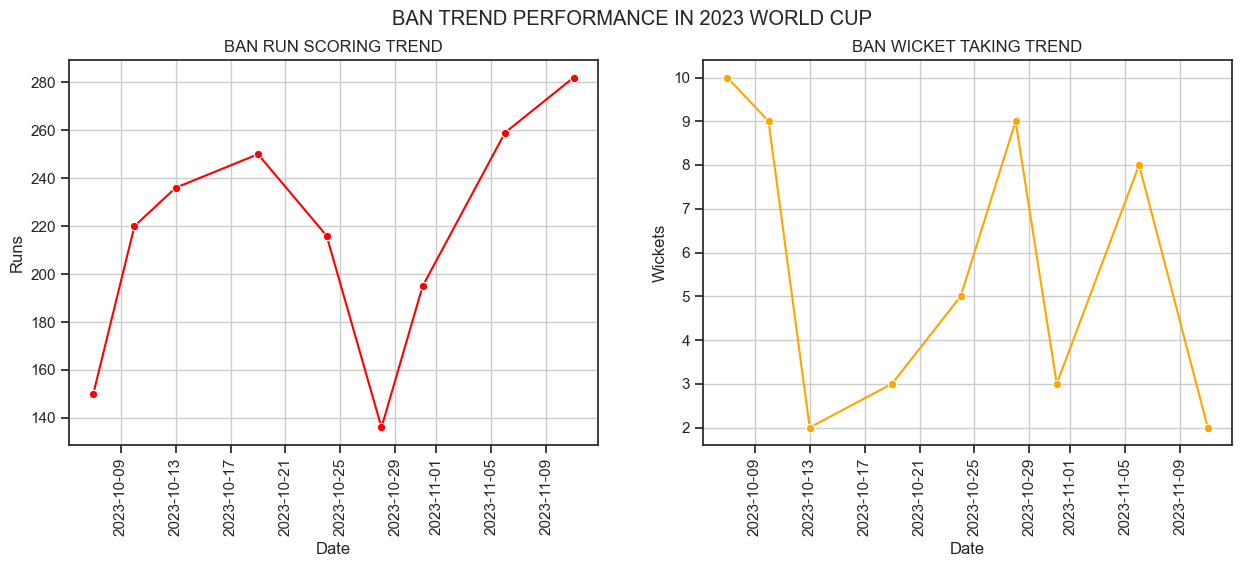

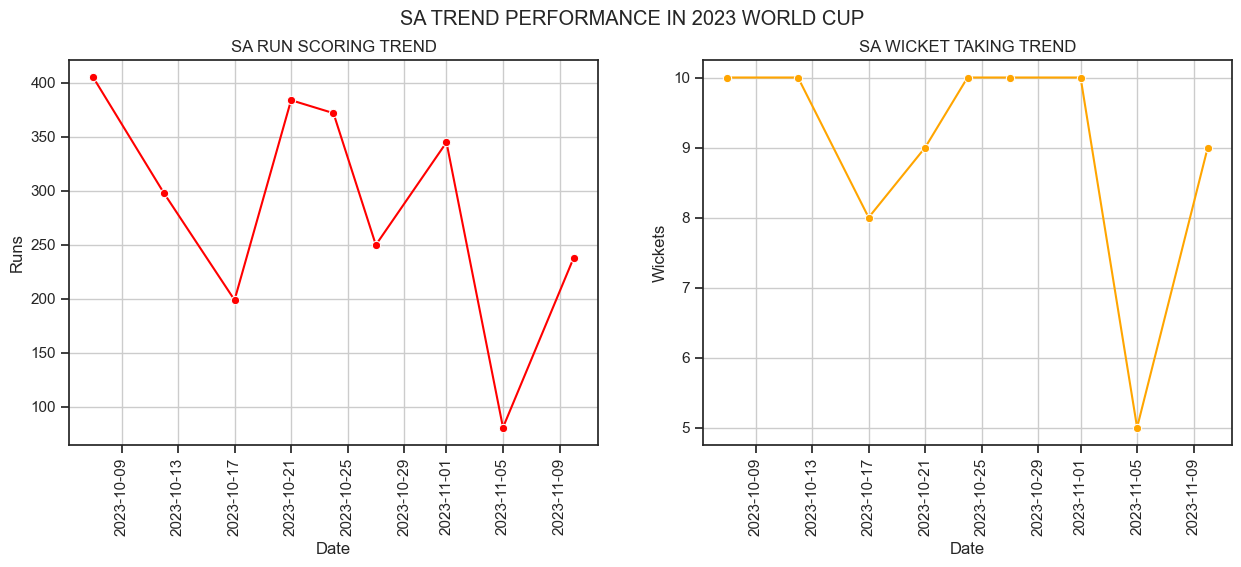

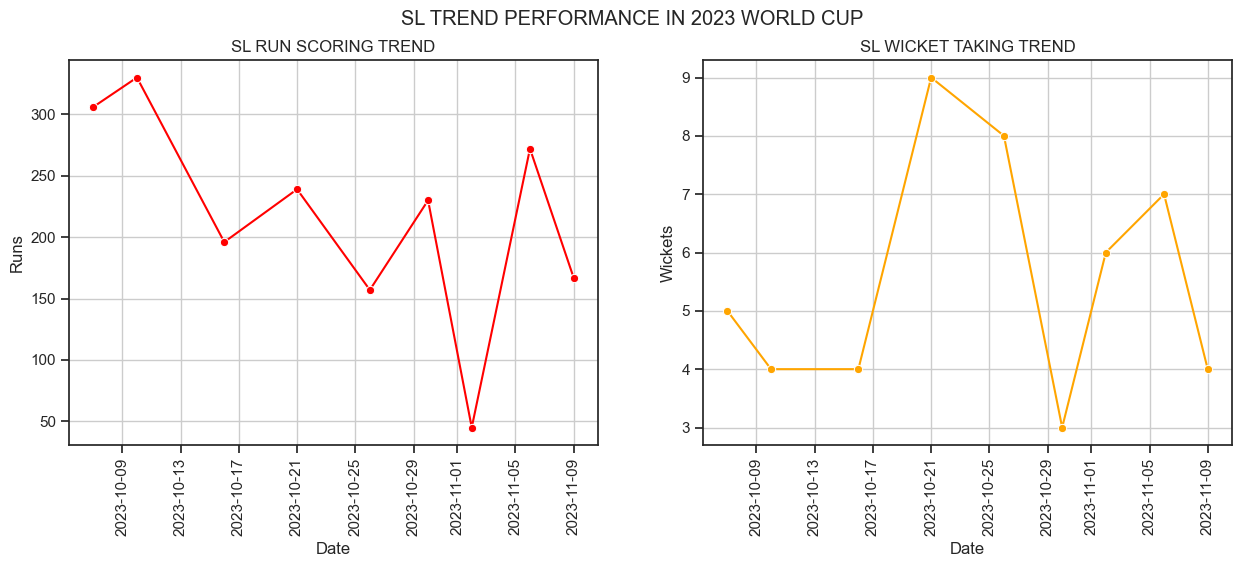

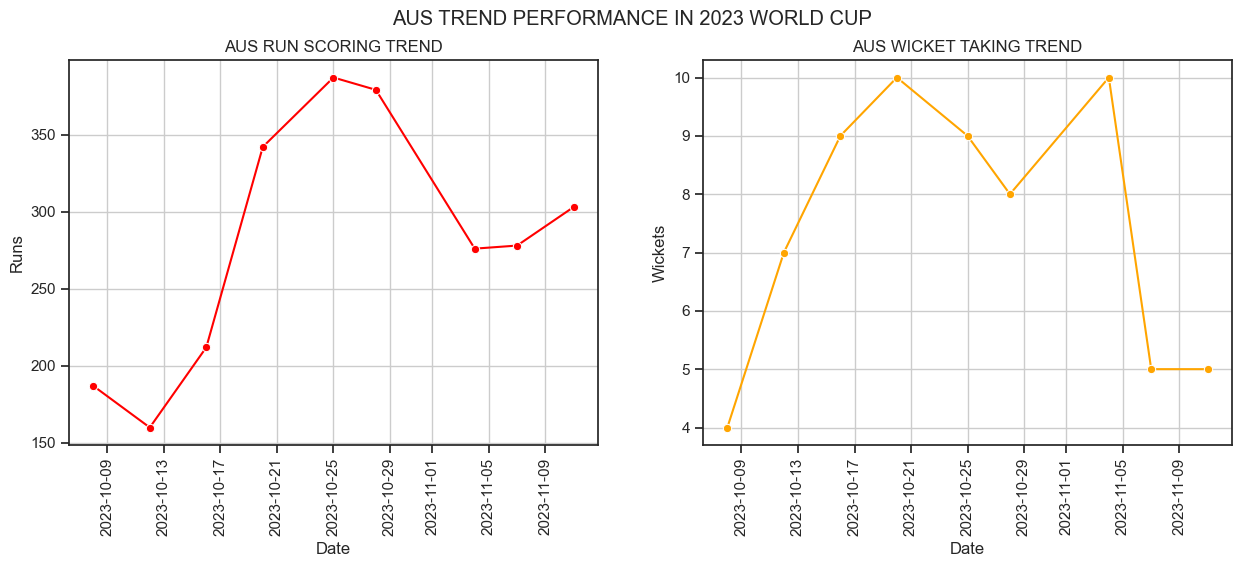

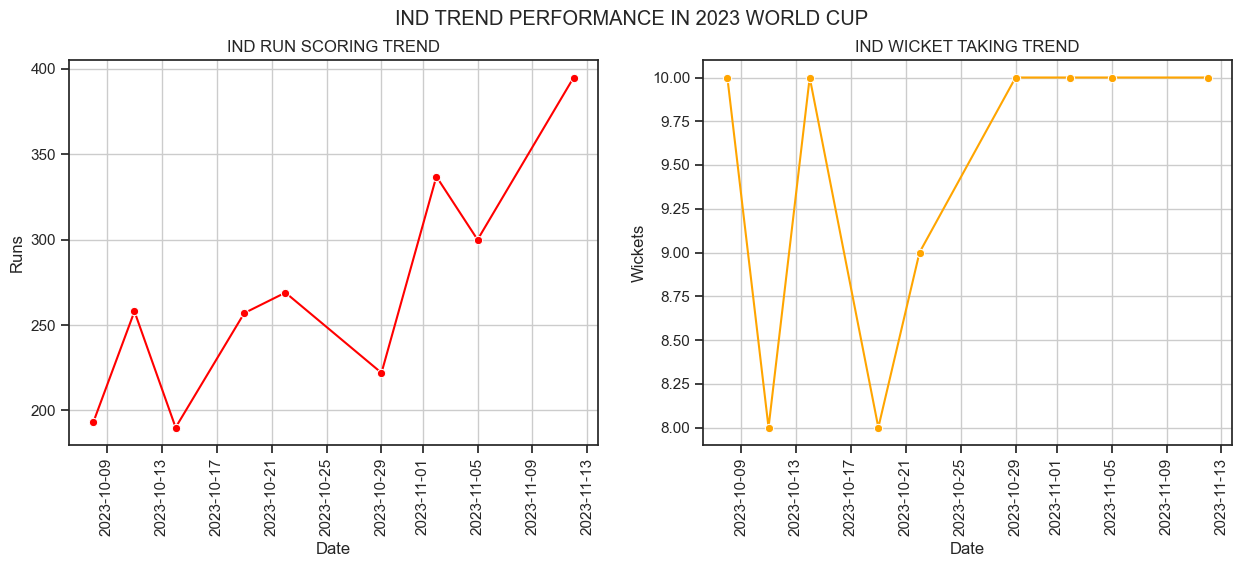

In [22]:
# temporal pattern
data['start_date'] = pd.to_datetime(data['start_date'])
bat_analysis = data[data['bat_or_bowl'] == 'bat'].groupby(['team','opposition','start_date'])[['runs']].sum().reset_index()
wkts_analysis = data[data['bat_or_bowl'] == 'bowl'].groupby(['team','opposition','start_date'])[['wkts']].sum().reset_index()
teams = list(data['team'].unique())
for team in teams:
    fig,(ax0,ax1) = plt.subplots(nrows=1,ncols=2,figsize=(15,5))
    sns.set_style('darkgrid')
    sns.set_style('ticks')
    sns.set_context('notebook')
    filter_bat_data = bat_analysis[bat_analysis['team'] == team][['runs','start_date']].sort_values('start_date')
    filter_wkt_data = wkts_analysis[wkts_analysis['team'] == team][['wkts','start_date']].sort_values('start_date')
    sns.lineplot(x=filter_bat_data['start_date'], y=filter_bat_data['runs'],color='red', marker='o', ax=ax0)
    ax0.set(title=f'{team} RUN SCORING TREND')
    ax0.set(xlabel='Date')
    ax0.set(ylabel='Runs')
    ax0.set_xticks(ax0.get_xticks())
    ax0.set_xticklabels(ax0.get_xticklabels(), rotation=90)
    ax0.grid(True)
    sns.lineplot(x=filter_wkt_data['start_date'],y=filter_wkt_data['wkts'],color='orange', marker='o', ax=ax1)
    ax1.set(title=f'{team} WICKET TAKING TREND')
    ax1.set(xlabel='Date')
    ax1.set(ylabel='Wickets')
    ax1.set_xticks(ax1.get_xticks())
    ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)
    ax1.grid(True)
    plt.suptitle(f'{team} TREND PERFORMANCE IN 2023 WORLD CUP')
    plt.show()

THESE ARE THE TEAMS FOR BATSMEN ANALYSIS:
1. PAK
2. ENG
3. NZ
4. AFG
5. NED
6. BAN
7. SA
8. SL
9. AUS
10. IND


ENTER THE NAME OF THE TEAM FROM ABOVE :  PAK



PAK PLAYER NAME FOR STUDYING THEIR BATTING TREND:
1. Haris Rauf (PAK)
2. Babar Azam (PAK)
3. Fakhar Zaman (PAK)
4. Hasan Ali (PAK)
5. Shaheen Shah Afridi (PAK)
6. Shadab Khan (PAK)
7. Saud Shakeel (PAK)
8. Mohammad Rizwan (PAK)
9. Mohammad Nawaz (3) (PAK)
10. Imam-ul-Haq (PAK)
11. Iftikhar Ahmed (PAK)
12. Abdullah Shafique (PAK)
13. Usama Mir (PAK)
14. Mohammad Wasim (1) (PAK)
15. Agha Salman (PAK)


ENTER THE NAME OF THE PLAYER :  Babar Azam (PAK)


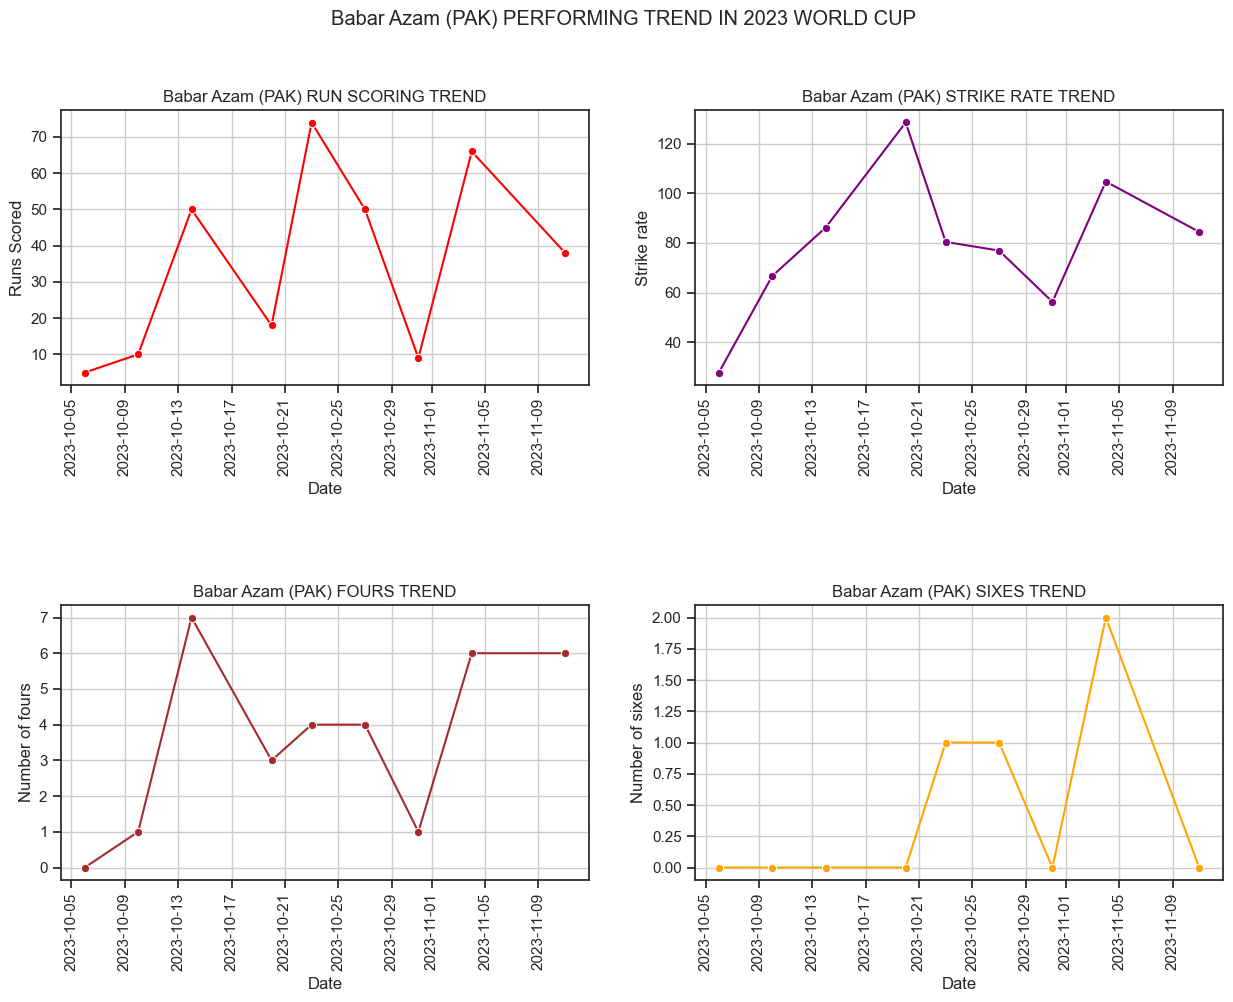

In [26]:
batter = data[data['bat_or_bowl'] == 'bat'].groupby(['team','opposition','player'])[['runs','4s','6s','sr','start_date']].first().reset_index()
batter['boundary'] = (batter['4s'] + batter['6s']).astype(int)
batter['start_date'] = pd.to_datetime(batter['start_date'])
print('THESE ARE THE TEAMS FOR BATSMEN ANALYSIS:')
for count,team in enumerate(teams,1):
    print(f'{count}. {team}')
team_name = input('ENTER THE NAME OF THE TEAM FROM ABOVE : ')

filtered_data = batter[batter['team'] == team_name][['player','runs','4s','6s','sr','start_date']].sort_values('start_date')
print()
player_name = list(filtered_data['player'].unique())
print(f'{team_name} PLAYER NAME FOR STUDYING THEIR BATTING TREND:')
for count,name in enumerate(player_name,1):
    print(f'{count}. {name}')
name = input('ENTER THE NAME OF THE PLAYER : ')
player_data = filtered_data[filtered_data['player'] == name][['runs','sr','4s','6s','start_date']].sort_values('start_date')

fig,((ax0,ax1),(ax2,ax3)) = plt.subplots(nrows=2,ncols=2,figsize=(15,10))
sns.set_context('notebook')
plt.subplots_adjust(hspace=.8)
sns.lineplot(x=player_data['start_date'],y=player_data['runs'],color='red',marker='o',ax=ax0)
ax0.set_xticks(ax0.get_xticks())
ax0.set_xticklabels(ax0.get_xticklabels(), rotation=90)
ax0.set(ylabel='Runs Scored')
ax0.set(xlabel='Date')
ax0.set(title=f'{name} RUN SCORING TREND')
ax0.grid(True)

sns.lineplot(x=player_data['start_date'],y=player_data['sr'],color='purple',marker='o',ax=ax1)
ax1.set_xticks(ax1.get_xticks())
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)
ax1.set(ylabel='Strike rate')
ax1.set(xlabel='Date')
ax1.set(title=f'{name} STRIKE RATE TREND')
ax1.grid(True)

sns.lineplot(x=player_data['start_date'],y=player_data['4s'],color='brown',marker='o',ax=ax2)
ax2.set_xticks(ax2.get_xticks())
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90)
ax2.set(ylabel='Number of fours')
ax2.set(xlabel='Date')
ax2.set(title=f'{name} FOURS TREND')
ax2.grid(True)

sns.lineplot(x=player_data['start_date'],y=player_data['6s'],color='orange',marker='o',ax=ax3)
ax3.set_xticks(ax3.get_xticks())
ax3.set_xticklabels(ax3.get_xticklabels(), rotation=90)
ax3.set(ylabel='Number of sixes')
ax3.set(xlabel='Date')
ax3.set(title=f'{name} SIXES TREND')
ax3.grid(True)

plt.suptitle(f'{name} PERFORMING TREND IN 2023 WORLD CUP')
plt.show()

THESE ARE THE TEAMS NAME FOR BOWLING ANALYSIS: 
1 : PAK
2 : ENG
3 : NZ
4 : AFG
5 : NED
6 : BAN
7 : SA
8 : SL
9 : AUS
10 : IND


ENTER THE NAME OF THE TEAM FROM ABOVE:  BAN



BAN PLAYER NAME FOR STUDYING THEIR BOWLING TREND:
0 : Mahmudullah (BAN)
1 : Mehidy Hasan Miraz (BAN)
2 : Mustafizur Rahman (BAN)
3 : Shakib Al Hasan (BAN)
4 : Shoriful Islam (BAN)
5 : Taskin Ahmed (BAN)
6 : Mahedi Hasan (BAN)
7 : Nasum Ahmed (BAN)
8 : Hasan Mahmud (BAN)
9 : Najmul Hossain Shanto (BAN)
10 : Tanzim Hasan Sakib (BAN)


ENTER THE NAME OF THE PLAYER :  Mustafizur Rahman (BAN)


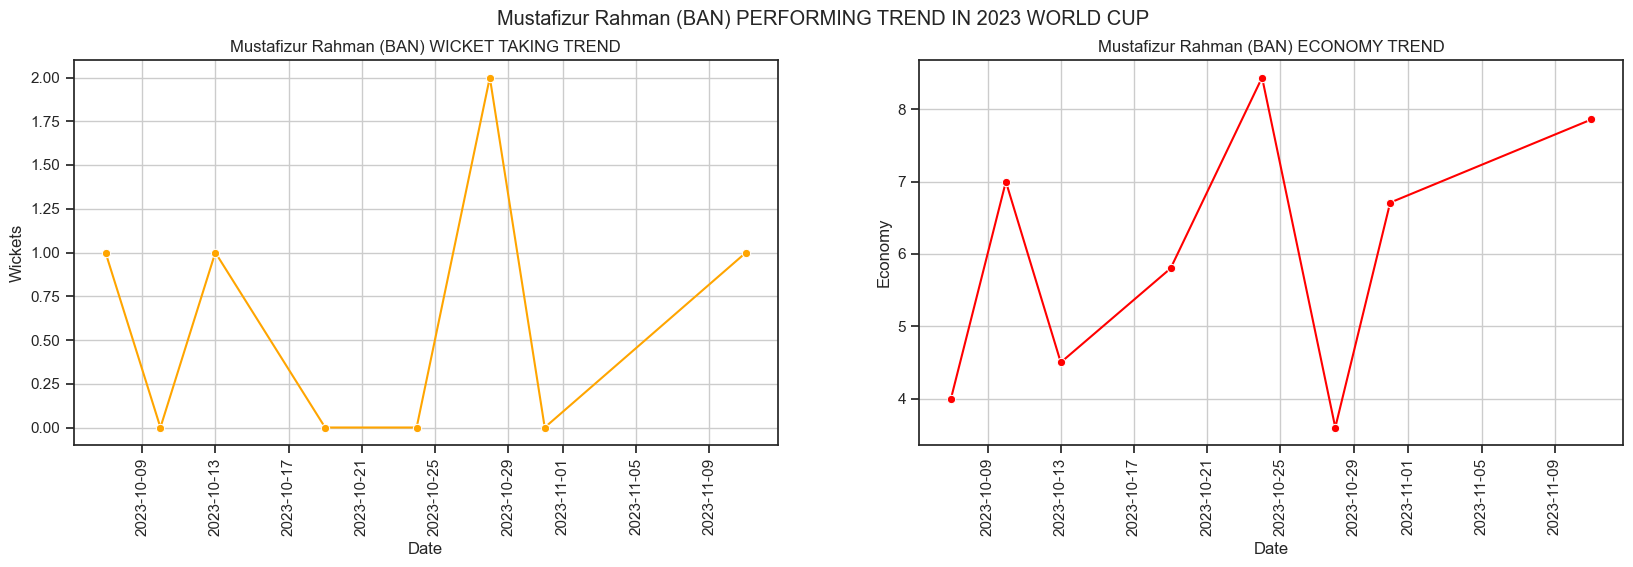

In [27]:
bowlers = data[data['bat_or_bowl'] == 'bowl'].groupby(['team','opposition','player'])[['runs','wkts','econ','bb_bf','start_date']].first().reset_index()
bowlers['start_date'] = pd.to_datetime(bowlers['start_date'])
print('THESE ARE THE TEAMS NAME FOR BOWLING ANALYSIS: ')
for count,team in enumerate(teams,1):
    print(f'{count} : {team}')
team_name = input('ENTER THE NAME OF THE TEAM FROM ABOVE: ')
filtered_data = bowlers[bowlers['team'] == team_name][['player','runs','wkts','econ','bb_bf','start_date']]
players = list(filtered_data['player'].unique())
print()
print(f'{team_name} PLAYER NAME FOR STUDYING THEIR BOWLING TREND:')
for count,player in enumerate(players):
    print(f'{count} : {player}')
name = input('ENTER THE NAME OF THE PLAYER : ')
player_data = filtered_data[filtered_data['player'] == name][['wkts','econ','start_date']].sort_values('start_date')

fig,(ax0,ax1) = plt.subplots(nrows=1,ncols=2,figsize=(20,5))
plt.subplots_adjust(hspace=.8)
sns.set_context('notebook')

sns.lineplot(x=player_data['start_date'],y=player_data['wkts'],color='orange',marker='o',ax=ax0)
ax0.set_xticks(ax0.get_xticks())
ax0.set_xticklabels(ax0.get_xticklabels(), rotation=90)
ax0.set(ylabel='Wickets')
ax0.set(xlabel='Date')
ax0.set(title=f'{name} WICKET TAKING TREND')
ax0.grid(True)

sns.lineplot(x=player_data['start_date'],y=player_data['econ'],color='red',marker='o',ax=ax1)
ax1.set_xticks(ax1.get_xticks())
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)
ax1.set(ylabel='Economy')
ax1.set(xlabel='Date')
ax1.set(title=f'{name} ECONOMY TREND')
ax1.grid(True)

plt.suptitle(f'{name} PERFORMING TREND IN 2023 WORLD CUP')
plt.show()